### HR Analytics: Mengoptimalkan Sumber Daya Manusia melalui Data

Dalam dunia bisnis yang terus berubah, peran Sumber Daya Manusia (HR) telah berkembang menjadi lebih dari sekadar administrasi dan pengelolaan karyawan. Saat ini, HR memegang peranan strategis yang penting dalam pengambilan keputusan organisasi. Bagaimana HR dapat mengoptimalkan tenaga kerja, meningkatkan produktivitas, dan memastikan kepuasan karyawan? Jawabannya adalah dengan menerapkan HR Analytics.

HR Analytics adalah pendekatan yang memanfaatkan data dan analisis untuk memahami lebih dalam dinamika organisasi, karyawan, dan lingkungan kerja. Ini membantu HR dalam mengidentifikasi pola-pola yang mungkin terlewatkan, memprediksi kebutuhan sumber daya manusia di masa depan, dan mengukur dampak kebijakan dan program HR. Dengan HR Analytics, perusahaan dapat membuat keputusan yang lebih tepat dan terinformasi.

Dalam perjalanan ini, kita akan menjelajahi dunia HR Analytics, memahami bagaimana data dapat digunakan untuk meningkatkan pengelolaan sumber daya manusia, memaksimalkan produktivitas karyawan, dan mencapai tujuan organisasi. Kami akan melihat berbagai metode analisis, teknik visualisasi, dan praktik terbaik dalam HR Analytics untuk membantu Anda meraih keberhasilan dalam pengelolaan sumber daya manusia. Mari kita mulai perjalanan ini menuju pemahaman yang lebih dalam tentang dunia HR Analytics.

Berikut dibawah ini merupakan Exploratory Data Analysis dari kelompok kami Data Wizards mengenai HR Analytics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? </br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?</br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?</br>
(min/mean/median/max/unique/top/freq)

In [2]:
# Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
df_train.sample(5)

enrollee_id      city  city_development_index  gender  \
14148        26479  city_134                   0.698  Female   
8667           900  city_103                   0.920    Male   
14465        17407  city_103                   0.920  Female   
5015         12383   city_14                   0.698     NaN   
4459          9048   city_21                   0.624     NaN   

           relevent_experience enrolled_university education_level  \
14148   No relevent experience                 NaN     High School   
8667   Has relevent experience       no_enrollment        Graduate   
14465   No relevent experience       no_enrollment             Phd   
5015   Has relevent experience       no_enrollment        Graduate   
4459    No relevent experience    Full time course        Graduate   

      major_discipline experience company_size   company_type last_new_job  \
14148              NaN          3          NaN            NaN        never   
8667        Humanities          4        10/49        Pvt Ltd            3   
14465       Humanities        >20       10000+  Public Sector           >4   
5015   Business Degree         13          <10        Pvt Ltd            1   
4459              STEM          2          NaN            NaN        never   

       training_hours  target  
14148              35     0.0  
8667               75     0.0  
14465              17     0.0  
5015              278     0.0  
4459               58     1.0

In [3]:
df_test.sample(5)

enrollee_id      city  city_development_index gender  \
1947         6610  city_100                   0.887    NaN   
1281         4370   city_21                   0.624   Male   
240         14539   city_69                   0.856   Male   
1296         2752   city_21                   0.624   Male   
1461        21976   city_16                   0.910   Male   

          relevent_experience enrolled_university education_level  \
1947  Has relevent experience       no_enrollment     High School   
1281   No relevent experience       no_enrollment     High School   
240   Has relevent experience       no_enrollment        Graduate   
1296   No relevent experience       no_enrollment        Graduate   
1461  Has relevent experience       no_enrollment        Graduate   

     major_discipline experience company_size    company_type last_new_job  \
1947              NaN        >20        10/49         Pvt Ltd            2   
1281              NaN          5          NaN             NaN            4   
240              STEM          7          <10  Funded Startup            1   
1296             STEM          5    5000-9999         Pvt Ltd            1   
1461             STEM        >20    1000-4999   Public Sector           >4   

      training_hours  
1947              37  
1281             244  
240               20  
1296              86  
1461              34

Data ini mencakup informasi terkait sumber daya manusia, dengan berbagai variabel seperti pengalaman, pendidikan, jenis kelamin, lokasi, dan lainnya. Terdapat beberapa nilai yang hilang dalam kolom-kolom seperti "gender" dan "company_size". Terdapat juga variasi dalam kolom "last_new_job" yang mencerminkan berapa lama seseorang telah mengganti pekerjaan terakhirnya. Data ini memiliki potensi besar untuk analisis HR yang mendalam. Dengan penerapan HR Analytics, perusahaan dapat memahami tren dalam perekrutan, retensi, dan pengembangan karyawan. Namun, sebelumnya, perlu melakukan pengelolaan data seperti mengisi nilai yang hilang dan memeriksa outlier.

In [4]:
# Informasi Data Frame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Jumlah Data: Data frame ini memiliki total <b>19,158 baris (entri) dan 14 kolom</b>.</br>

#### Kolom dengan Data Tipe Integer (int64):

enrollee_id: Kolom ID pendaftar.</br>
training_hours: Kolom jumlah jam pelatihan.</br>

#### Kolom dengan Data Tipe Float (float64):</br>

city_development_index: Indeks perkembangan kota.</br>
target: Kolom target, mungkin berhubungan dengan suatu prediksi atau klasifikasi.</br>

#### Kolom dengan Data Tipe Object (teks):</br>

city: Nama kota.</br>
gender: Jenis kelamin pendaftar.</br>
relevent_experience: Pengalaman yang relevan.</br>
enrolled_university: Universitas tempat pendaftar terdaftar.</br>
education_level: Tingkat pendidikan pendaftar.</br>
major_discipline: Disiplin ilmu utama pendaftar.</br>
experience: Pengalaman pendaftar.</br>
company_size: Ukuran perusahaan di mana pendaftar bekerja.</br>
company_type: Tipe perusahaan di mana pendaftar bekerja.</br>
last_new_job: Jumlah tahun sejak pekerjaan terakhir.</br>

#### Target Variable:
Kolom  target digunakan sebagai variabel target untuk tugas analisis atau pemodelan. Tipe data kolom ini adalah float64, yang menunjukkan kemungkinan ini adalah kolom target yang mengandung nilai numerik.

In [5]:
# Mengelompokkan kolom - kolom dari data frame
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size',
      'company_type','last_new_job']
nums=['enrollee_id','city_development_index','training_hours','target']

In [6]:
#Statistik Deskriptif kolom numerikal
df_train[nums].describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

Statistik deskriptif untuk kolom numerikal:</br>
1. Kolom 'enrollee_id' memiliki rentang ID pendaftar dari 1 hingga 33,380, dengan distribusi yang merata.</br>
2. Kolom 'city_development_index' memiliki rata-rata sekitar 0.829 dengan range yang wajar antara 0.448 hingga 0.949.</br>
3. Kolom 'training_hours' memiliki rata-rata sekitar 65.37 dengan range antara 1 hingga 336.</br>
4. Kolom 'target' adalah variabel biner, di mana sekitar 25% pendaftar memiliki nilai target 1.</br>

<b>Tidak ada data yang mencolok atau aneh dalam statistik ini.</b>

In [7]:
# Statistik deskriptif kolom kategorikal
df_train[cats].describe()

city gender      relevent_experience enrolled_university  \
count      19158  14650                    19158               18772   
unique       123      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        4355  13221                    13792               13817   

       education_level major_discipline experience company_size company_type  \
count            18698            16345      19093        13220        13018   
unique               5                6         22            8            6   
top           Graduate             STEM        >20        50-99      Pvt Ltd   
freq             11598            14492       3286         3083         9817   

       last_new_job  
count         18735  
unique            6  
top               1  
freq           8040

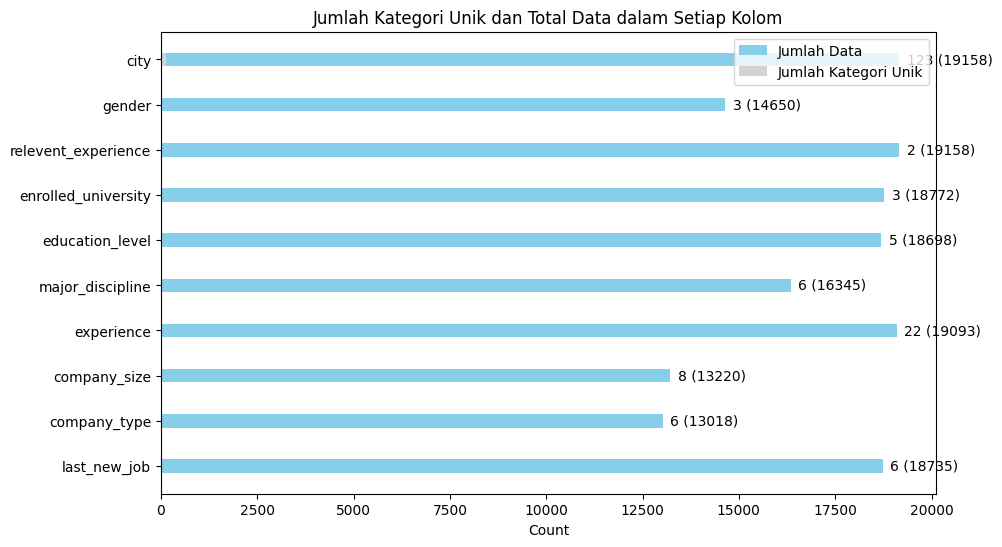

In [8]:
columns = ["city", "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]
count = [19158, 14650, 19158, 18772, 18698, 16345, 19093, 13220, 13018, 18735]
unique_values = [123, 3, 2, 3, 5, 6, 22, 8, 6, 6]

plt.figure(figsize=(10, 6))
bar_width = 0.3 
index = range(len(columns))

plt.barh(index, count, bar_width, color='skyblue', label='Jumlah Data')
plt.barh(index, unique_values, bar_width, color='lightgrey', label='Jumlah Kategori Unik')

for i in index:
    plt.text(count[i] + 200, i, f'{unique_values[i]} ({count[i]})', va='center')

plt.xlabel('Count')
plt.title('Jumlah Kategori Unik dan Total Data dalam Setiap Kolom')
plt.yticks(index, columns)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


Statistik deskriptif untuk kolom kategorikal:</br>

1. Kolom 'gender' memiliki data yang hilang dan berisi jenis kelamin paling umum adalah 'Male' dengan jenis kelamin Unik ada 3 dan Jumlah data 14.650.
2. Kolom 'enrolled_university' memiliki data yang hilang dan mayoritas tidak terdaftar di universitas jumlah Unik 3 dan Jumlah data 18.772.
3. Kolom 'education_level' memiliki data yang hilang dan mayoritas adalah lulusan Nilai Unik: 5 Jumlah Data: 18,698
4. Kolom 'major_discipline' memiliki beberapa nilai unik dan yang paling umum adalah 'STEM' Nilai Unik: 6 Jumlah Data: 16,345.
5. Kolom 'company_size' memiliki data yang hilang dan ukuran '50-99' adalah yang paling umum Nilai Unik: 8 Jumlah Data: 13,220
6. Kolom 'company_type' memiliki data yang hilang dan 'Pvt Ltd' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 13,018
7. Kolom 'last_new_job' memiliki data yang hilang dan '1' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 18,735

<b>!! Kolom gender memiliki 3 nilai unik (seharusnya terdapat 2 gender saja (Male dan Female))</b>

In [9]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df_train.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df_train.isna().sum()/len(df_train))

Missing Values
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing Values Percentage
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


#### Data yang Tidak Lengkap (NaN): 
Beberapa kolom seperti <b>gender, enrolled_university, education_level, major_discipline, experience, company_size, dan company_type </b> memiliki nilai yang hilang (NaN).

# 1. Descriptive Statistics (Kesimpulan)

A. Semua tipe data sudah sesuai </br>
B. Kolom <b> gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new job, dan training_hours</b> memiliki nilai kosong </br>
C. Kolom gender yang seharusnya memiliki 2 nilai unik ternyata memiliki 3 nilai unik.

# 2. Univariate Analysis

Gunakan <b>visualisasi</b> untuk melihat distribusi masing-masing kolom (feature maupun target).</br>
Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik</br> (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).</br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Numerical Features

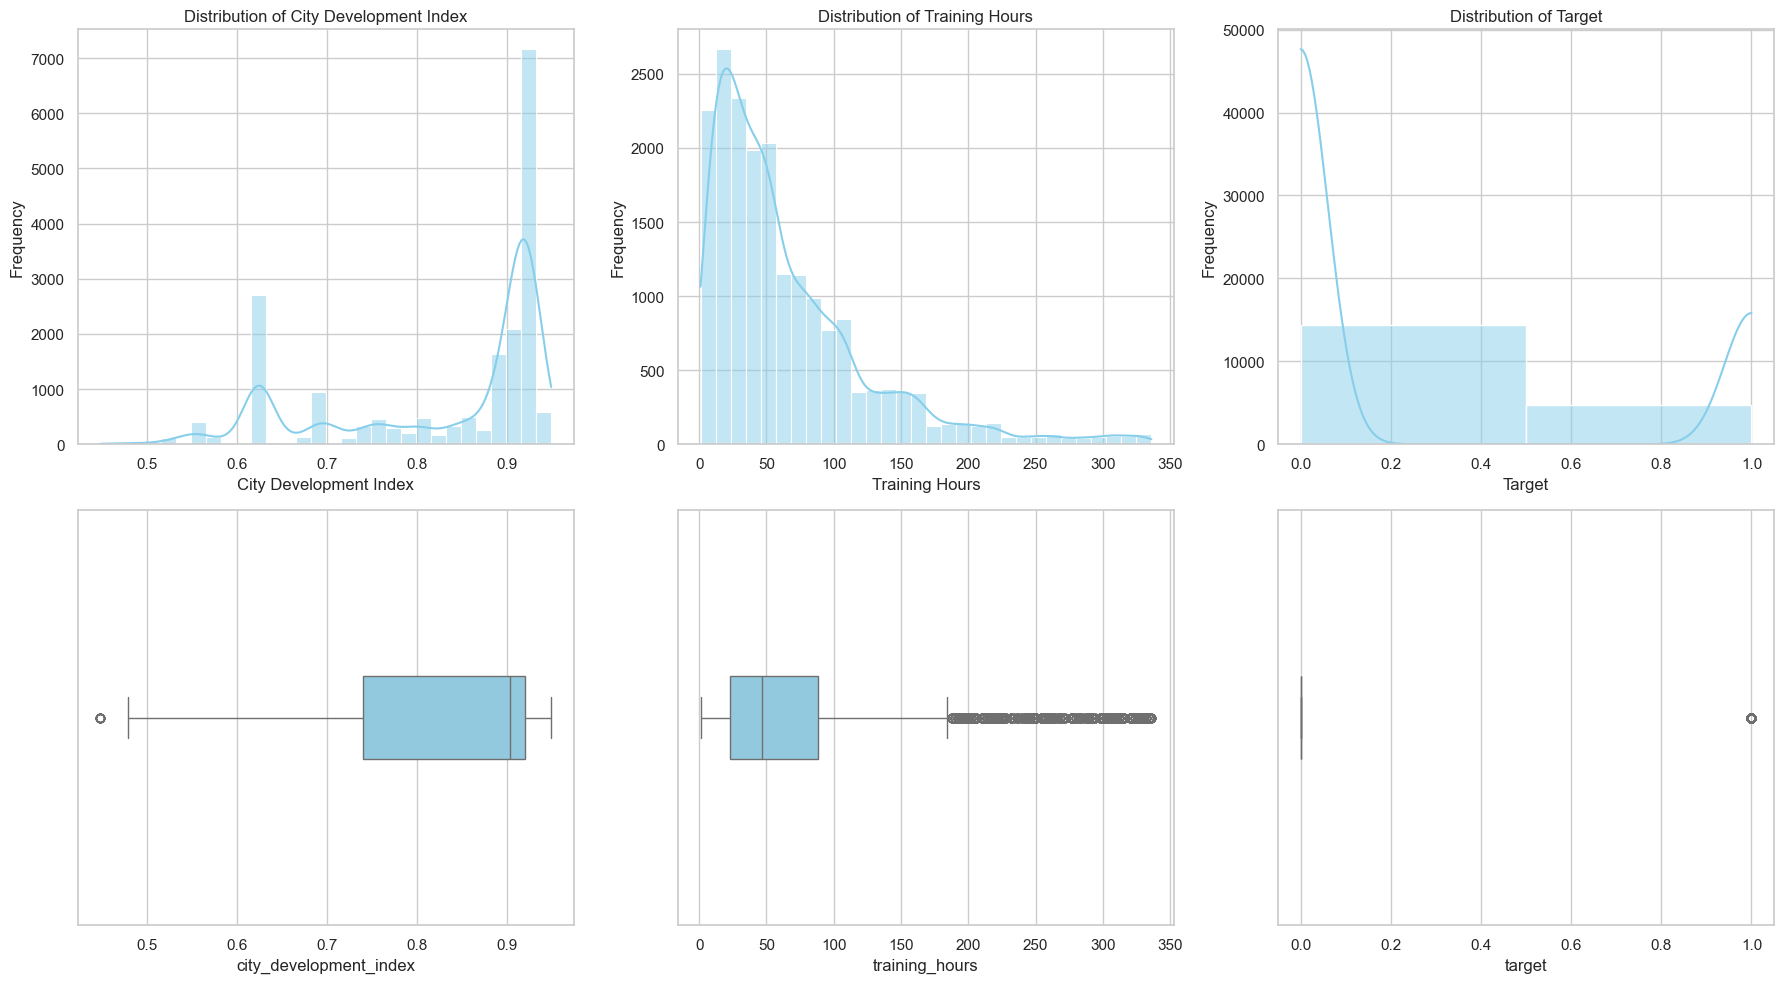

In [10]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df_train['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df_train['city_development_index'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 1], x=df_train['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df_train['training_hours'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 2], x=df_train['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df_train['target'], color='skyblue', width=0.2)

plt.tight_layout()

plt.show()


#### Kesimpulan data numerikal

1. Distribution of City Development Index (Distribusi Indeks Pembangunan Kota):
CDI memiliki distribusi <b>bimodal</b> dengan dua puncak.</br>
Mayoritas data terkonsentrasi di sekitar nilai tengah indeks pembangunan kota.</br>
Terdapat beberapa nilai ekstrem yang diidentifikasi sebagai outlier dalam box plot.</br>
2. Distribution of Training Hours (Distribusi Jam Pelatihan):
Distribusi jam pelatihan <b>skew ke kanan</b> (positively skewed) dengan nilai<b> median yang lebih kecil daripada mean</b> (lihat df.describe pada no.1).
Mayoritas data berpusat di sekitar nilai rendah hingga menengah jam pelatihan.
Terdapat beberapa data yang diidentifikasi sebagai outlier dalam box plot, yang mengindikasikan jam pelatihan yang jauh lebih tinggi dari mayoritas.</br>
3. Distribution of Target (Distribusi Target):
Distribusi target menunjukkan bahwa mayoritas data adalah "non-seeking" (tidak mencari pekerjaan) dengan <b>persentase 3:1</b>.
Dengan kata lain, hanya 25% enrollee adalah pencari pekerjaan baru.

### Categorical Features

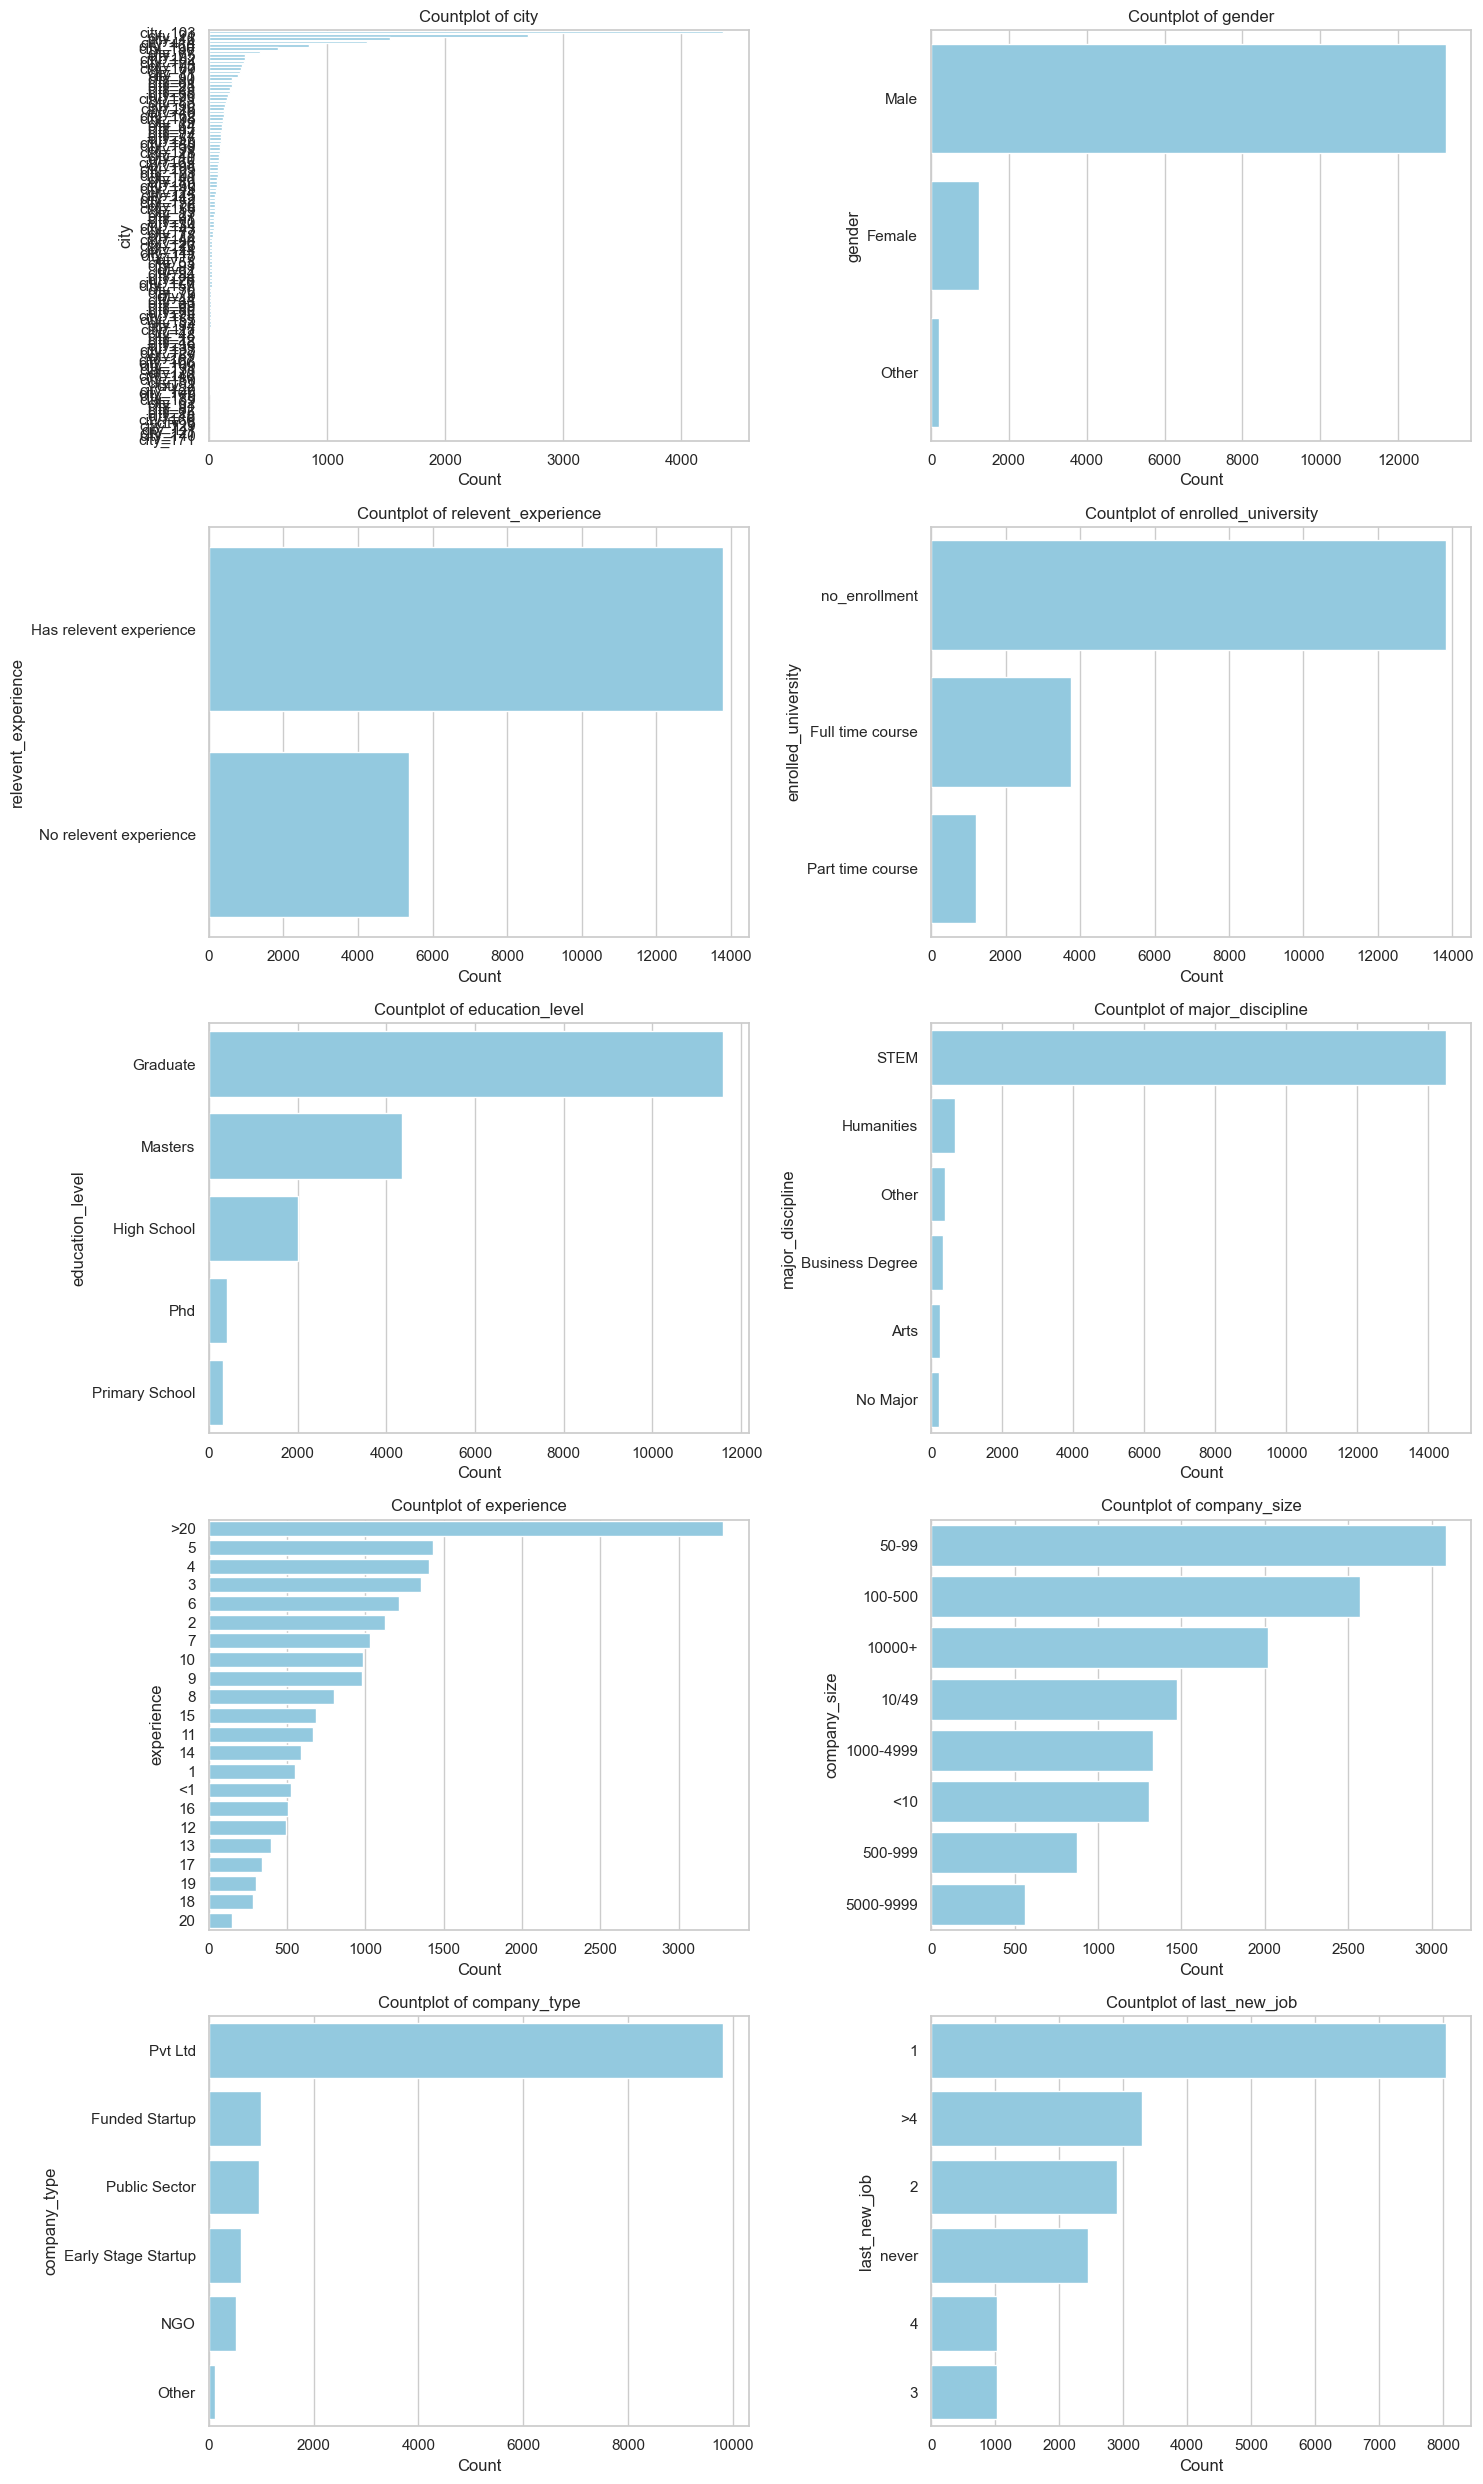

In [11]:
# Select the categorical features
categorical_features = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience', 'company_size',
                        'company_type', 'last_new_job']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through categorical features and plot bar charts
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train, y=feature, ax=axes[i], order=df_train[feature].value_counts().index, color='skyblue')
    axes[i].set_title(f'Countplot of {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Kesimpulan data kategorikal
city: Distribusi kota agak <b>tidak merata</b>, beberapa kota memiliki <b>frekuensi yang tinggi</b>.</br>
gender: Terdapat kategori <b>'Other'</b> yang mungkin perlu diperiksa lebih lanjut. Selain itu, <b>perbedaan frekuensi antara jenis kelamin cukup besar</b>.</br>
relevent_experience: <b>Mayoritas</b> kandidat<B> memiliki pengalaman relevan</b>.</br>
education_level: Kategori <b>'Primary School'</b> memiliki frekuensi yang <b>rendah</b> dibandingkan dengan kategori lainnya.</br>
major_discipline: Mayoritas kandidat memiliki disiplin mayor di bidang <b>Engineering</b>.</br>
experience: Distribusi pengalaman terlihat wajar, namun ada beberapa nilai yang mungkin perlu diinspeksi lebih lanjut.</br>
company_size: Kategori <b>'50-99' dan '100-500' memiliki frekuensi tertinggi</b>. Nilai 10/49 perlu diubah menjadi 10-49</br>
company_type: Mayoritas kandidat bekerja di perusahaan sektor <b>Private</b>.</br>
last_new_job: Mayoritas kandidat telah mengganti pekerjaan dalam waktu <b>kurang dari satu tahun</b>.</br>
target: <b>Distribusi target tidak seimbang</b>, dengan <b>mayoritas</b> kandidat <b>tidak mencari perubahan pekerjaan</b>.</br>

#### Follow-up <b>data preprocessing</b> yang dapat dilakukan meliputi:

Handling Missing Values: Perlu memeriksa dan mengatasi nilai yang hilang pada kolom dengan missing values seperti 'gender','enrolled_university', 'education_level', dsb.</br>
Outlier Detection and Handling: Memeriksa apakah ada outlier pada variabel numerik dan mengambil tindakan yang sesuai jika ada.</br>
Encoding Categorical Variables: Melakukan encoding pada variabel kategorikal untuk mengubahnya menjadi bentuk numerik yang dapat digunakan dalam pemodelan.</br>
Balancing Target: Mengambil tindakan untuk menangani ketidakseimbangan dalam target (oversampling, undersampling, atau metode lainnya).</br>
Feature Scaling: Melakukan normalisasi atau standardisasi pada variabel numerik jika dibutuhkan.</br>
Feature Engineering: Mungkin ada kemungkinan untuk menggabungkan, memisahkan, atau mengubah fitur untuk meningkatkan kinerja model.</br>
Validasi Data: Memastikan bahwa dataset telah divalidasi dengan benar untuk mengidentifikasi potensi masalah atau anomali lain yang perlu ditangani.

# 3. Multivariate Analysis + 4. Business Insight
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas).</br> Tuliskan hasil observasinya, seperti:</br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?</br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?</br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

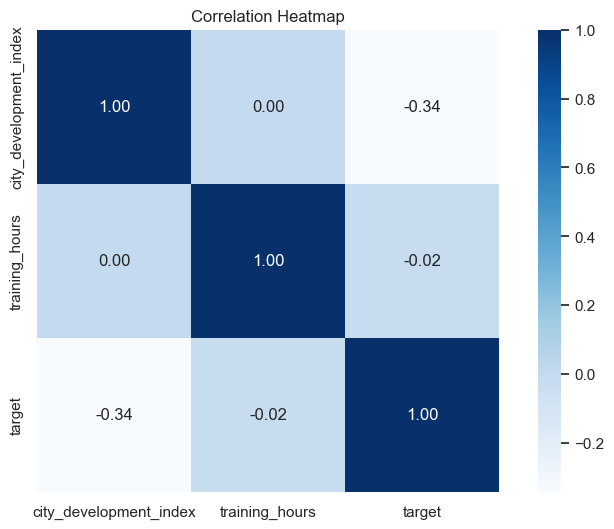

In [12]:
# Selecting the numerical features and target
numerical_features = ['city_development_index', 'training_hours', 'target']

# Subset the DataFrame with only the numerical features
numerical_df = df_train[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


Dari heatmap korelasi antara fitur-fitur numerik dan target ("city_development_index", "training_hours," dan "target"), kita dapat membuat beberapa kesimpulan:

1. City Development Index (CDI): Korelasi antara CDI dan target sangat rendah (0.04). Ini menunjukkan bahwa <b>CDI tidak memiliki pengaruh signifikan terhadap keputusan pencari kerja untuk mencari pekerjaan baru.</b>

2. Training Hours: Korelasi antara jumlah jam pelatihan ("training_hours") dan target juga rendah (-0.021). Ini menunjukkan bahwa <b>jumlah jam pelatihan yang diambil oleh pencari kerja juga tidak memiliki pengaruh signifikan terhadap keputusan mereka untuk mencari pekerjaan baru.</b>

Kesimpulannya, dari analisis korelasi, tidak ada fitur numerik yang memiliki korelasi yang kuat dengan kolom "target." Ini menunjukkan bahwa keputusan pencari kerja untuk mencari pekerjaan baru <b>kemungkinan besar dipengaruhi oleh faktor-faktor lain yang tidak tercakup dalam fitur-fitur numerik ini.</b> Oleh karena itu, penting untuk mempertimbangkan fitur-fitur lain atau faktor-faktor kualitatif dalam analisis yang mungkin lebih memengaruhi keputusan pencari kerja.

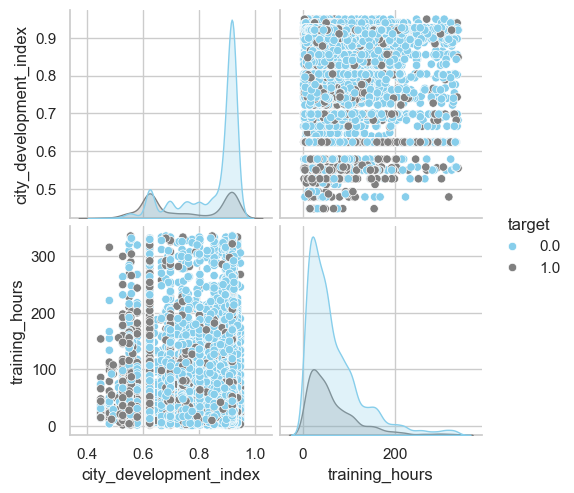

In [13]:
custom_palette = ["skyblue", "grey"]

# Define selected features for the pairplot
selected_features = ['city_development_index', 'training_hours', 'target']

# Create pairplot for selected features
sns.pairplot(df_train[selected_features], hue='target', palette=custom_palette, diag_kind='kde')
plt.show()

Pairplot ini memvisualisasikan hubungan antara variabel 'city_development_index' dan 'training_hours' dengan membedakan berdasarkan variabel target.
Seaborn pairplot digunakan untuk memahami sebaran data antara variabel 'city_development_index' dan 'training_hours' terhadap target (1 atau 0).
Tidak ada perbedaan signifikan dalam pola antara orang yang mencari pekerjaan baru (target 1) dan yang tidak (target 0) berdasarkan hubungan antara 'city_development_index' dan 'training_hours'. Ini terlihat dari sebaran titik-titik yang relatif seragam.

Hasil dari korelasi antara 'city_development_index' dan 'training_hours' terhadap target tidak ditampilkan dalam visualisasi. Namun, Anda dapat melihat korelasi ini di luar pairplot.
Nilai korelasi antara 'city_development_index' dan 'training_hours' dengan target akan memberikan informasi lebih lanjut tentang sejauh mana kedua fitur ini berhubungan dengan variabel target.
Kesimpulannya, pairplot mengungkapkan perbedaan yang signifikan dalam pola data antara variabel 'city_development_index' dan 'training_hours' dengan variabel target. 

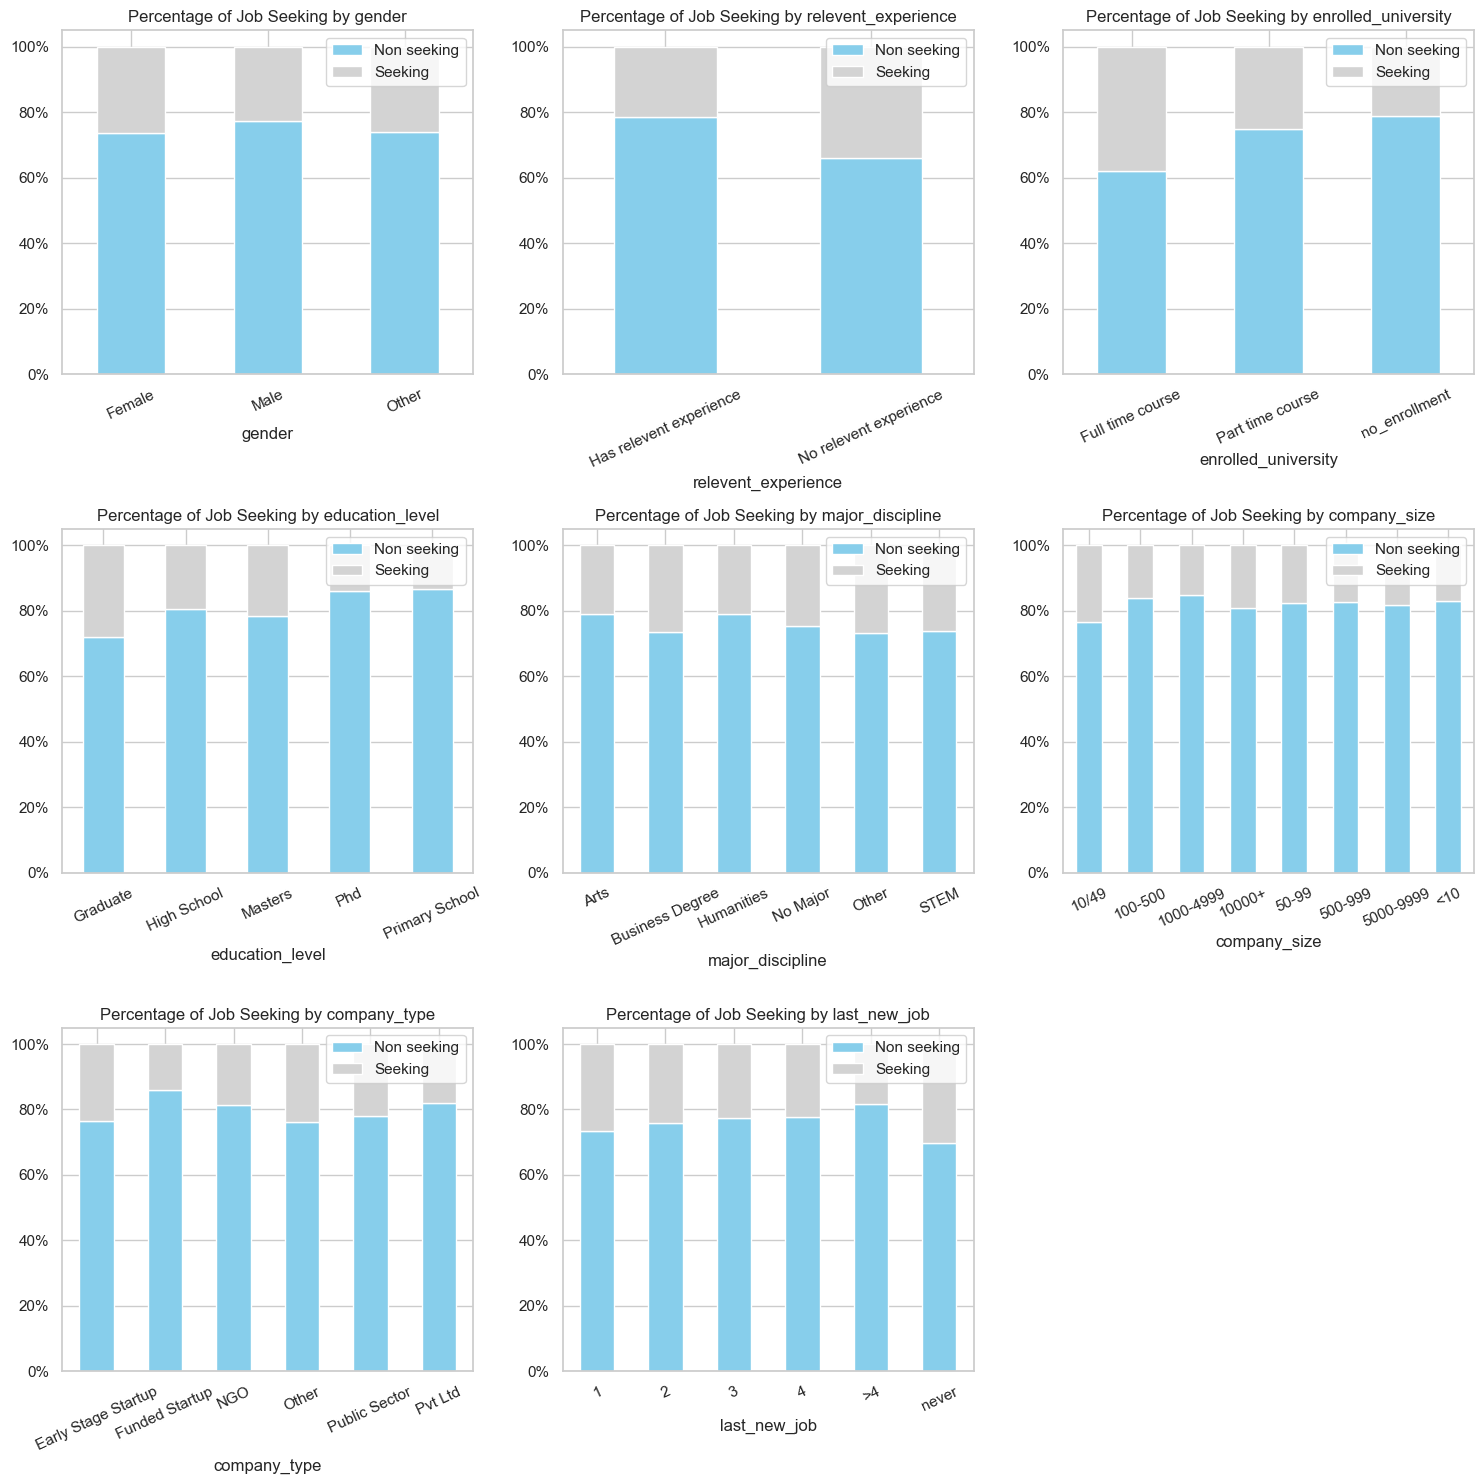

In [14]:
cats1 = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']

num_categories = len(cats1)
subplots_per_row = 3
num_rows = (num_categories + subplots_per_row - 1) // subplots_per_row

fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, num_rows * 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define the colors for 'Non seeking' and 'Seeking'
colors = ['skyblue', 'lightgrey']

for i, cols in enumerate(cats1, 1):
    data = df_train.groupby([cols, 'target'])['target'].count().unstack().fillna(0)
    data_percentage = data.div(data.sum(axis=1), axis=0)

    row = (i - 1) // subplots_per_row
    col = (i - 1) % subplots_per_row

    ax = data_percentage.plot(kind='bar', stacked=True, color=colors, ax=axes[row, col])
    ax.set_title(f'Percentage of Job Seeking by {cols}')
    ax.legend(labels=('Non seeking', 'Seeking'))
    ax.set_xticklabels(data_percentage.index, rotation=25)
    ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])

for i in range(num_categories, num_rows * subplots_per_row):
    row = i // subplots_per_row
    col = i % subplots_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Dari visualisasi yang disajikan, kita dapat menarik beberapa kesimpulan terkait dengan persentase pencari pekerjaan (seeking) berdasarkan berbagai kategori yang terdapat dalam dataset:

1. <b>Gender</b> (Jenis Kelamin):
Presentase "Seeking' pada gender Female lebih tinggi dibandingkan Male. Mayoritas data menunjukkan persentase "Non Seeking" yang lebih tinggi daripada "Seeking" di semua kelompok jenis kelamin.

2. <b>Relevant Experience </b>(Pengalaman Terkait):
Orang-orang dengan pengalaman terkait cenderung memiliki persentase "Non seeking" yang lebih tinggi dibandingkan dengan yang tidak memiliki pengalaman terkait.

3. <b>Enrolled University </b>(Status Pendaftaran Universitas):
Orang-orang yang terdaftar di universitas memiliki persentase "Seeking" yang lebih tinggi dibandingkan dengan mereka yang tidak terdaftar di universitas.
Mungkin ada korelasi antara tidak terdaftarnya di universitas dengan pencarian pekerjaan baru.

4. <b>Education Level</b> (Tingkat Pendidikan):
Tidak ada tren yang konsisten dalam persentase pencari pekerjaan berdasarkan tingkat pendidikan. Namun, individu dengan tingkat pendidikan "Graduate" cenderung memiliki persentase "Seeking" yang lebih tinggi.

5. <b>Major Discipline </b>(Disiplin Ilmu Utama):
Tidak ada perbedaan yang signifikan dalam persentase pencari pekerjaan berdasarkan disiplin ilmu utama.
Persentase "Non seeking" lebih dominan dalam semua disiplin ilmu utama.

6. <b>Company Size</b> (Ukuran Perusahaan):
Individu yang bekerja di perusahaan dengan ukuran 10-49 orang cenderung memiliki persentase "Seeking" yang lebih tinggi.
Perusahaan dengan ukuran 100-500 dan 1000-4999 memiliki persentase "Non seeking" yang lebih tinggi.

7. <b>Company Type</b> (Jenis Perusahaan):
Perusahaan berjenis 'Funded Startup' memiliki presentase 'Seeking' terkecil dibanding jenis perusahaan lainnya.

8. <b>Last New Job</b> (Pekerjaan Terakhir):
Orang-orang yang telah bekerja dalam pekerjaan sebelumnya selama 1 tahun memiliki persentase "Seeking" yang lebih tinggi.
Individu dengan pekerjaan terakhir selama 4-5 tahun cenderung memiliki persentase "Non seeking" yang lebih tinggi.

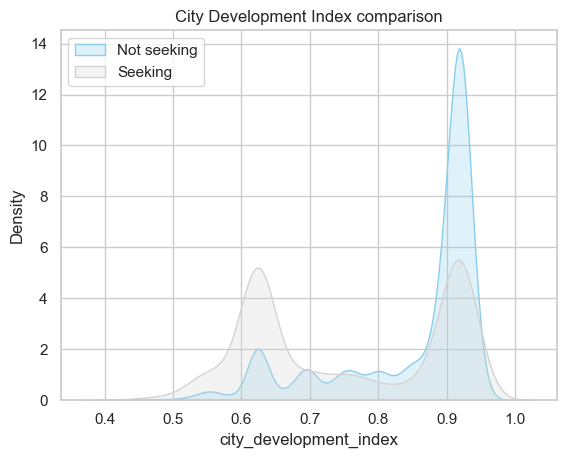

In [15]:
df0 = df_train[df_train['target']==0]
df1 = df_train[df_train['target']==1]

fig = sns.kdeplot(df0['city_development_index'] , fill=True, color="skyblue")
fig = sns.kdeplot(df1['city_development_index'], fill=True, color="lightgrey")
plt.title('City Development Index comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper left')
plt.show()

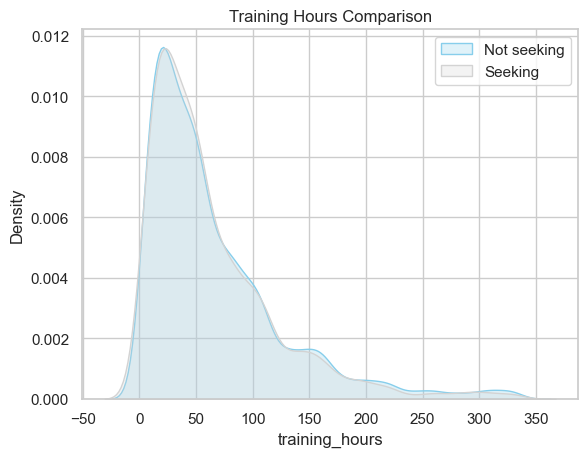

In [16]:
df0 = df_train[df_train['target']==0]
df1 = df_train[df_train['target']==1]

fig = sns.kdeplot(df0['training_hours'] , fill=True, color="skyblue")
fig = sns.kdeplot(df1['training_hours'], fill=True, color="lightgrey")
plt.title('Training Hours Comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper right')
plt.show()

Dalam visualisasi "City Development Index comparison", terdapat dua distribusi yang dibandingkan, yaitu "Not seeking" (Tidak mencari pekerjaan) dan "Seeking" (Mencari pekerjaan) dengan menggunakan kernel density estimation (KDE). Berikut adalah kesimpulan dari grafik tersebut:

1. Warna biru mewakili mereka yang tidak mencari pekerjaan (Not seeking).
2. Warna abu-abu mewakili mereka yang sedang mencari pekerjaan (Seeking).
3. Perpotongan antara grafik seeking dan non seeking pada CDI 0.75 menunjukan <b>mayoritas pencari pekerjaan baru (seeking) bertempat pada kota dengan CDI yang rendah (<0.75)</b>. Para <b>non-pencari kerja</b> bertempat mayoritas pada kota dengan <b>CDI > 0.75</b>.

### Business Insight

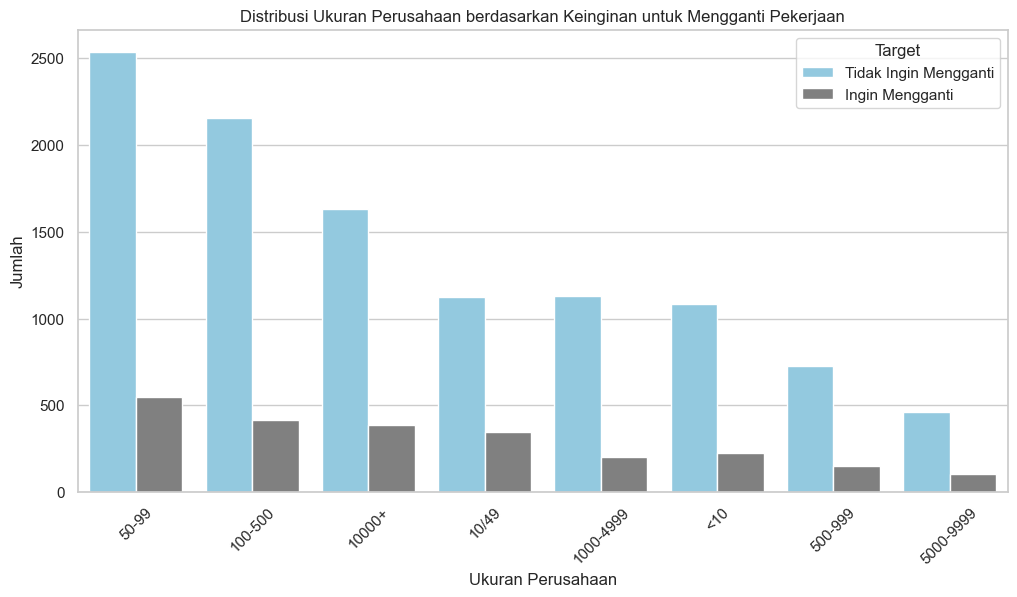

In [17]:
plt.figure(figsize=(12, 6))
custom_palette = ["skyblue", "grey"]
sns.countplot(data=df_train, x='company_size', hue='target', order=df_train['company_size'].value_counts().index, palette=custom_palette)
plt.title('Distribusi Ukuran Perusahaan berdasarkan Keinginan untuk Mengganti Pekerjaan')
plt.xlabel('Ukuran Perusahaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Tidak Ingin Mengganti', 'Ingin Mengganti'])
plt.show()

<Figure size 1200x600 with 0 Axes>

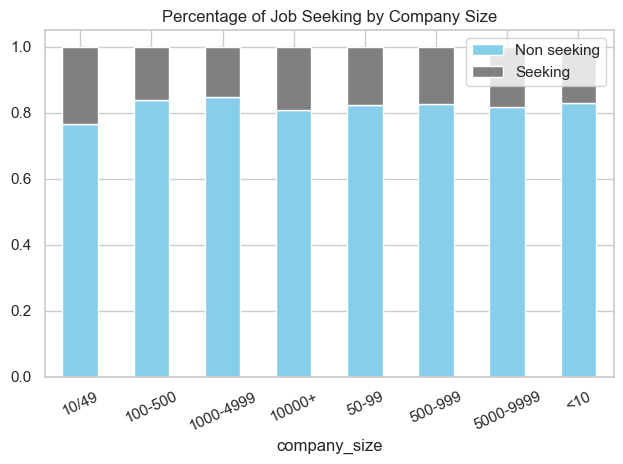

In [18]:
plt.figure(figsize=(12,6))
df_train.groupby('company_size')['target'].value_counts(normalize=True).unstack('target').plot.bar(stacked=True, color=custom_palette)
plt.title(f'Percentage of Job Seeking by Company Size')
plt.legend(labels=('Non seeking', 'Seeking'))
plt.xticks(rotation = 25)
    
plt.tight_layout()
plt.show()

Dalam plot distribusi ukuran perusahaan berdasarkan keinginan untuk mengganti pekerjaan, kami menggunakan warna "skyblue" untuk merepresentasikan kategori "Tidak Ingin Mengganti" dan warna "grey" untuk merepresentasikan kategori "Ingin Mengganti". Beberapa kesimpulan dari plot ini adalah:

1. Walaupun secara jumlah, perusahaan berukuran "50-99" dan "100-500" menjadi perusahaan dengan jumlah sampel enrollee terbanyak, namun secara presentase, kedua perusahaan tersebut memiliki jumlah "Seeker" yang masih di bawah 20%.

2. Begitupun dengan ukuran perusahaan "500-999" dan "5000-9999", dengan jumlah sampel yang sedikit, kedua perusahaan tersebut-pun masih memiliki presentase "Seeker" di bawah 20%.

3. Sebaliknya, satu-satunya perusahaan yang memiliki presentase pencari pekerjaan lebih dari 20% adalah yang berukuran "10-49".

Insight Bisnis :

1. Penyelidikan Lanjutan: Meskipun tidak ada ukuran perusahaan yang secara signifikan mendominasi, perusahaan berukuran "50-99" tampaknya menarik bagi karyawan baik yang ingin mengganti pekerjaan maupun yang tidak. Bisnis dapat melakukan penyelidikan lebih lanjut untuk memahami faktor-faktor yang membuat ukuran perusahaan ini menarik.

2. Perbedaan Preferensi: Distribusi ukuran perusahaan yang bervariasi menunjukkan bahwa preferensi karyawan dalam hal ukuran perusahaan dapat sangat beragam. Ini menyoroti pentingnya beragam dalam strategi rekrutmen dan retensi karyawan.

3. Strategi HR: Analisis ini dapat membantu departemen sumber daya manusia (HR) dalam merancang strategi untuk menjaga karyawan yang sudah ada dan merekrut karyawan baru. Misalnya, perusahaan dengan ukuran "50-99" dapat menjadi fokus bagi upaya rekrutmen.

4. Pemahaman Pasar Tenaga Kerja: Mengetahui preferensi karyawan terkait ukuran perusahaan dapat membantu bisnis dalam memahami pasar tenaga kerja dan merespons perubahan dalam preferensi karyawan.

5. Bisa dipertimbangkan mengingat perusahaaan di kota dengan CDI >0.75 memiliki retention rate yang lebih tinggi untuk berfokus pada penempatan perusahaan baru di kota-kota dengan CDI yang lebih tinggi.

6. Perlu penyelidikan lebih lanjut khusus untuk perusahaan berukuran <b> 10-49</b> untuk mengetahui penyebab tingginya presentase enrollee yang mencari pekerjaan baru.

7. Pentingnya 'relevant experience': Karyawan yang memiliki pengalaman terkait dapat lebih diprioritaskan untuk training mengingat rate of retention mereka yang lebih tinggi.

8. Rate of retention <b>'Graduate'</b> yang hanya sekitar 70% dapat diteliti lebih lanjut, apakah faktor kausalnya. 

## Data Cleansing

### Handle missing values

In [19]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df_train.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df_train.isna().sum()/len(df_train))

Missing Values
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing Values Percentage
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


In [20]:
#Mengisi Missing Value
for column in columns:
    if df_train[column].isnull().sum()>0:
        df_train[column].replace(np.nan,df_train[column].mode()[0],inplace=True)

In [21]:
df_train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Handle Missing value di setiap kolom dengan modus

### Handle Duplicate Data

In [22]:
df_train.duplicated().sum()

0

Tidak ada data yang duplicate

### Handle outliers

In [23]:
#4. Filtering Outliers using Z-score
# Penjelasan: Filtering hanya dilakukan pada kolom 'city_development_index','training_hours'
# Kolom-kolom ini diharapkan menjadi fitur yang akan digunakan pada pemodelan dan dapat memprediksi 

from scipy import stats

In [24]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in ['city_development_index','training_hours']:
    zscore = abs(stats.zscore(df_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 18691


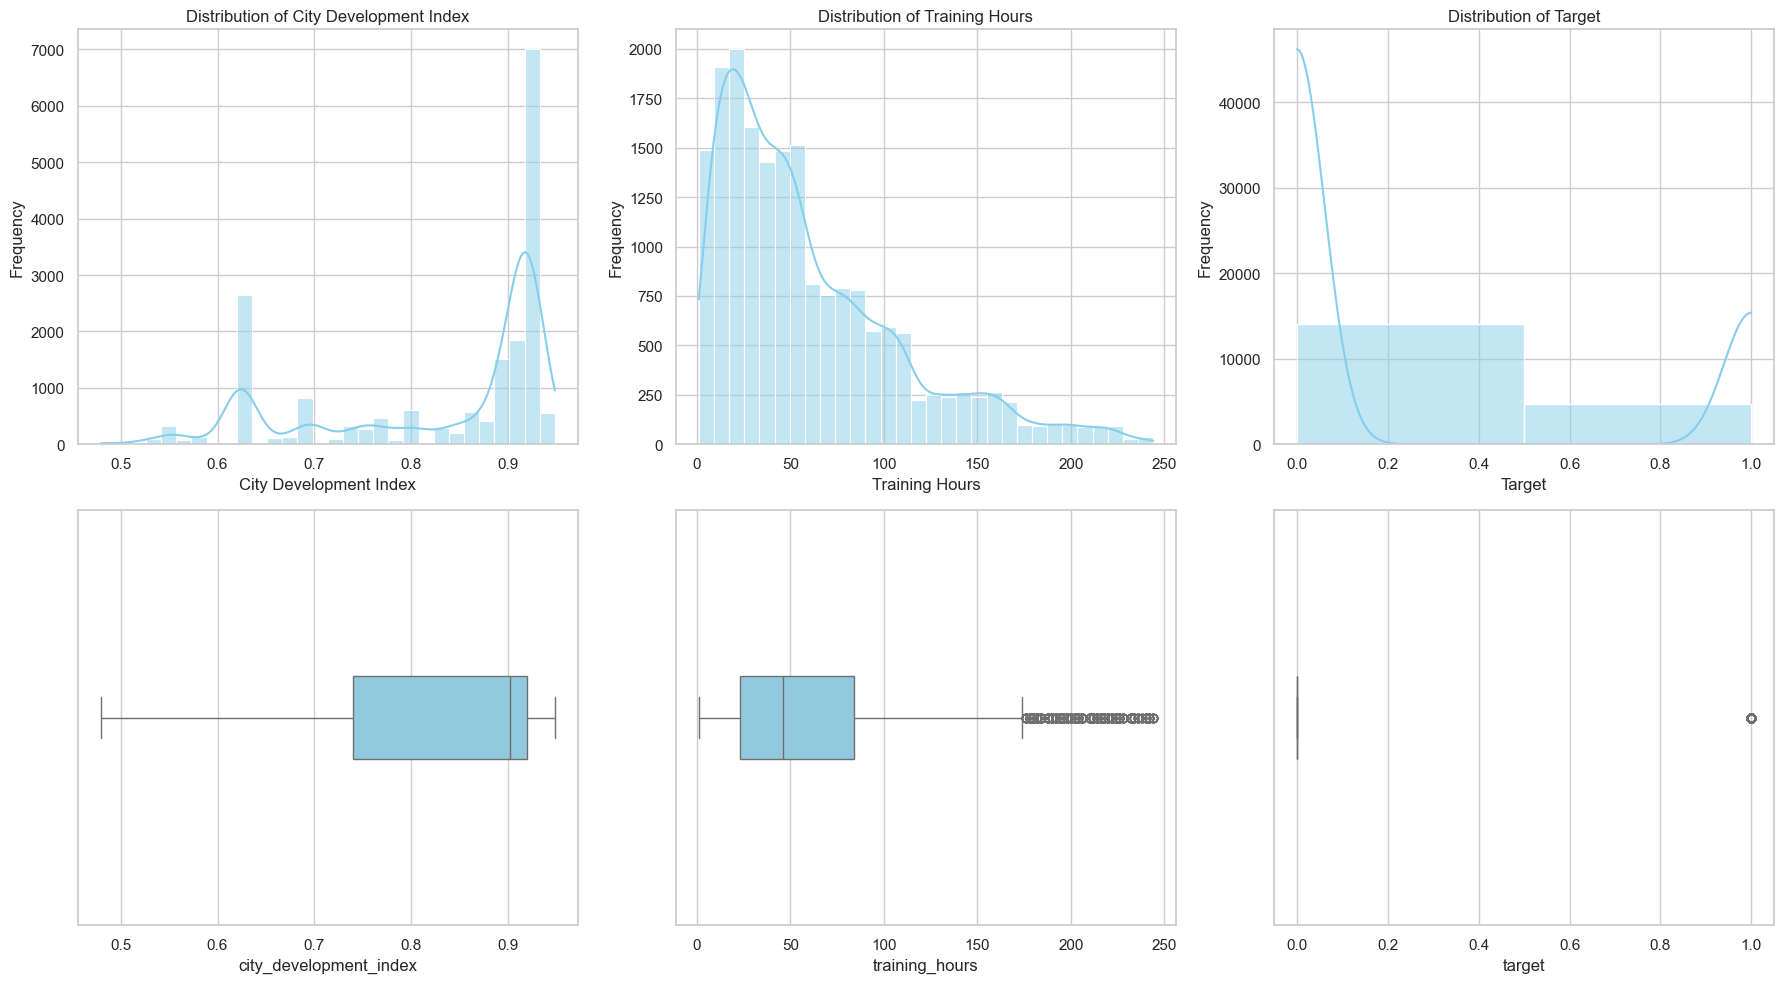

In [25]:
#Distribusi data berdasarkan numerical setelah droping rows
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df['city_development_index'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 1], x=df['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df['training_hours'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 2], x=df['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df['target'], color='skyblue', width=0.2)

plt.tight_layout()

plt.show()

### Feature Transformation

In [26]:
df['th_log']= np.log(df['training_hours'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18691 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18691 non-null  int64  
 1   city                    18691 non-null  object 
 2   city_development_index  18691 non-null  float64
 3   gender                  18691 non-null  object 
 4   relevent_experience     18691 non-null  object 
 5   enrolled_university     18691 non-null  object 
 6   education_level         18691 non-null  object 
 7   major_discipline        18691 non-null  object 
 8   experience              18691 non-null  object 
 9   company_size            18691 non-null  object 
 10  company_type            18691 non-null  object 
 11  last_new_job            18691 non-null  object 
 12  training_hours          18691 non-null  int64  
 13  target                  18691 non-null  float64
 14  th_log                  18691 non-null  flo

<Figure size 640x480 with 0 Axes>

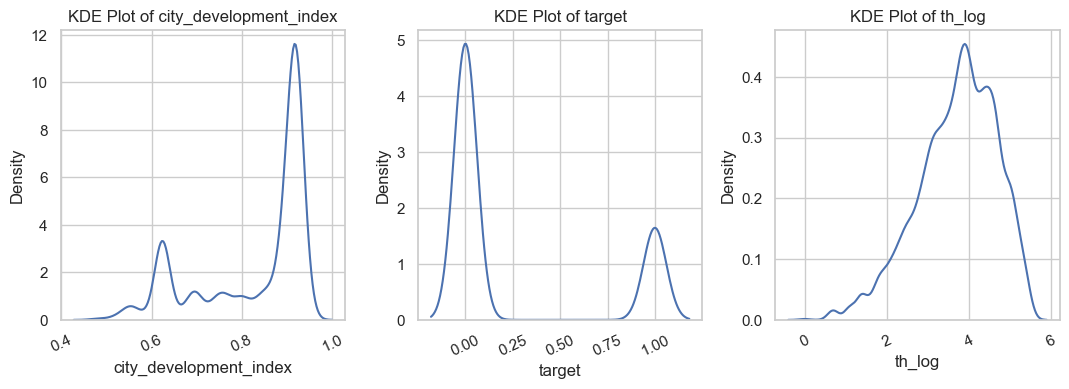

In [28]:
#Melihat distribusi setelah transformasi fitur

new_nums_df = df.select_dtypes(include='float64')
new_nums = new_nums_df.columns


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.figure( figsize=(18, 18))
for i, cols in enumerate(new_nums, 0):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(data=df, x=cols)
    plt.title(f'KDE Plot of {cols}')
    plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

### Feature Encoding

In [29]:
# Mengganti tanda "/" dengan tanda "-"
# Mengganti 10/49 menjadi 10-49

df['company_size'] = df['company_size'].str.replace('/', '-')

# Mengganti "100-500" menjadi "100-499"
df['company_size'] = df['company_size'].str.replace('100-500', '100-499')

In [30]:
categorical = ['enrolled_university','education_level','major_discipline','company_type']

for cat in categorical:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [31]:
df.sample(3)

enrollee_id      city  city_development_index  gender  \
18904        25236   city_97                   0.925    Male   
4131         25058  city_116                   0.743  Female   
861          26682   city_89                   0.925    Male   

           relevent_experience enrolled_university education_level  \
18904  Has relevent experience       no_enrollment        Graduate   
4131   Has relevent experience       no_enrollment         Masters   
861    Has relevent experience       no_enrollment        Graduate   

      major_discipline experience company_size  ...  \
18904             STEM          5        10-49  ...   
4131              STEM         11      500-999  ...   
861               STEM        >20       10000+  ...   

      major_discipline_Humanities major_discipline_No Major  \
18904                       False                     False   
4131                        False                     False   
861                         False                     False   

       major_discipline_Other  major_discipline_STEM  \
18904                   False                   True   
4131                    False                   True   
861                     False                   True   

       company_type_Early Stage Startup  company_type_Funded Startup  \
18904                             False                        False   
4131                              False                        False   
861                               False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
18904             False               False                       False   
4131              False               False                       False   
861               False               False                       False   

       company_type_Pvt Ltd  
18904                  True  
4131                   True  
861                    True  

[3 rows x 35 columns]

In [32]:
#label encoding feature gender
gender_mapping = {
    'Female': 0,
    'Male': 1,
    'Other': 2
}

df['gender'] = df['gender'].map(gender_mapping)


In [33]:
df.sample(5)

enrollee_id      city  city_development_index  gender  \
8508         20586  city_123                   0.738       1   
12713         1856  city_103                   0.920       1   
9816         10286  city_114                   0.926       1   
1141         24191  city_136                   0.897       1   
10268         8704  city_103                   0.920       1   

           relevent_experience enrolled_university education_level  \
8508   Has relevent experience       no_enrollment        Graduate   
12713  Has relevent experience    Full time course        Graduate   
9816    No relevent experience    Full time course        Graduate   
1141    No relevent experience       no_enrollment         Masters   
10268  Has relevent experience       no_enrollment        Graduate   

      major_discipline experience company_size  ...  \
8508        Humanities          2        50-99  ...   
12713             STEM          5    5000-9999  ...   
9816              STEM         10      100-499  ...   
1141        Humanities        >20        50-99  ...   
10268             STEM        >20       10000+  ...   

      major_discipline_Humanities major_discipline_No Major  \
8508                         True                     False   
12713                       False                     False   
9816                        False                     False   
1141                         True                     False   
10268                       False                     False   

       major_discipline_Other  major_discipline_STEM  \
8508                    False                  False   
12713                   False                   True   
9816                    False                   True   
1141                    False                  False   
10268                   False                   True   

       company_type_Early Stage Startup  company_type_Funded Startup  \
8508                              False                        False   
12713                             False                        False   
9816                              False                        False   
1141                              False                        False   
10268                             False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
8508              False               False                       False   
12713             False               False                       False   
9816              False               False                       False   
1141              False               False                       False   
10268             False               False                       False   

       company_type_Pvt Ltd  
8508                   True  
12713                  True  
9816                   True  
1141                   True  
10268                  True  

[5 rows x 35 columns]

In [34]:
#label encoding feature relevant_experience
relevent_experience_mapping = {
    'No relevent experience': 0,
    'Has relevent experience': 1
}
df['relevent_experience'] = df['relevent_experience'].map(relevent_experience_mapping)

In [35]:
df.sample(5)

enrollee_id      city  city_development_index  gender  \
13992        17571  city_160                   0.920       1   
15495        30986   city_21                   0.624       1   
4053         31906   city_73                   0.754       1   
1121         14793  city_116                   0.743       1   
2538          5409   city_57                   0.866       1   

       relevent_experience enrolled_university education_level  \
13992                    1       no_enrollment        Graduate   
15495                    1       no_enrollment         Masters   
4053                     1    Full time course        Graduate   
1121                     1       no_enrollment         Masters   
2538                     1       no_enrollment        Graduate   

      major_discipline experience company_size  ...  \
13992             STEM        >20        10-49  ...   
15495             STEM         15        50-99  ...   
4053             Other          7        50-99  ...   
1121              STEM        >20    1000-4999  ...   
2538              STEM         20      100-499  ...   

      major_discipline_Humanities major_discipline_No Major  \
13992                       False                     False   
15495                       False                     False   
4053                        False                     False   
1121                        False                     False   
2538                        False                     False   

       major_discipline_Other  major_discipline_STEM  \
13992                   False                   True   
15495                   False                   True   
4053                     True                  False   
1121                    False                   True   
2538                    False                   True   

       company_type_Early Stage Startup  company_type_Funded Startup  \
13992                             False                        False   
15495                              True                        False   
4053                              False                        False   
1121                              False                        False   
2538                              False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
13992             False               False                       False   
15495             False               False                       False   
4053              False               False                       False   
1121              False               False                       False   
2538              False               False                       False   

       company_type_Pvt Ltd  
13992                  True  
15495                 False  
4053                   True  
1121                   True  
2538                   True  

[5 rows x 35 columns]

In [36]:
#label encoding feature enrolled_university
enrolled_university_mapping = {
    'no_enrollment': 0,
    'Part time course': 1,
    'Full time course': 2
}
df['enrolled_university'] = df['enrolled_university'].map(enrolled_university_mapping)

In [37]:
df.sample(5)

enrollee_id      city  city_development_index  gender  \
4688         28417  city_103                   0.920       0   
7478          6288  city_160                   0.920       1   
4032          2540  city_102                   0.804       1   
17620        11619   city_21                   0.624       0   
10020        12075  city_160                   0.920       1   

       relevent_experience  enrolled_university education_level  \
4688                     1                    2        Graduate   
7478                     1                    0        Graduate   
4032                     1                    0        Graduate   
17620                    0                    2        Graduate   
10020                    1                    0        Graduate   

      major_discipline experience company_size  ...  \
4688              STEM          7        50-99  ...   
7478              Arts          8      500-999  ...   
4032              STEM         11      100-499  ...   
17620             STEM          3      500-999  ...   
10020             STEM          9      100-499  ...   

      major_discipline_Humanities major_discipline_No Major  \
4688                        False                     False   
7478                        False                     False   
4032                        False                     False   
17620                       False                     False   
10020                       False                     False   

       major_discipline_Other  major_discipline_STEM  \
4688                    False                   True   
7478                    False                  False   
4032                    False                   True   
17620                   False                   True   
10020                   False                   True   

       company_type_Early Stage Startup  company_type_Funded Startup  \
4688                              False                        False   
7478                              False                        False   
4032                              False                        False   
17620                             False                        False   
10020                              True                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
4688               True               False                       False   
7478              False               False                       False   
4032              False               False                       False   
17620              True               False                       False   
10020             False               False                       False   

       company_type_Pvt Ltd  
4688                  False  
7478                   True  
4032                   True  
17620                 False  
10020                 False  

[5 rows x 35 columns]

In [38]:
#label encoding feature education_level
education_level_mapping = {
    'Primary School': 0,
    'High School': 1,
    'Graduate': 2,
    'Masters': 3,
    'Phd': 4
}
df['education_level'] = df['education_level'].map(education_level_mapping)

In [39]:
df.sample(5)

enrollee_id      city  city_development_index  gender  \
18314        16122  city_103                   0.920       1   
16046         8676  city_103                   0.920       1   
6805          4000  city_114                   0.926       1   
10377        11534   city_21                   0.624       1   
15258        29626   city_21                   0.624       1   

       relevent_experience  enrolled_university  education_level  \
18314                    1                    0                3   
16046                    1                    0                2   
6805                     1                    0                3   
10377                    1                    0                2   
15258                    1                    0                3   

      major_discipline experience company_size  ...  \
18314             STEM         19       10000+  ...   
16046       Humanities        >20        50-99  ...   
6805             Other         17        10-49  ...   
10377             STEM          4        50-99  ...   
15258             STEM          5      100-499  ...   

      major_discipline_Humanities major_discipline_No Major  \
18314                       False                     False   
16046                        True                     False   
6805                        False                     False   
10377                       False                     False   
15258                       False                     False   

       major_discipline_Other  major_discipline_STEM  \
18314                   False                   True   
16046                   False                  False   
6805                     True                  False   
10377                   False                   True   
15258                   False                   True   

       company_type_Early Stage Startup  company_type_Funded Startup  \
18314                             False                        False   
16046                             False                        False   
6805                              False                        False   
10377                             False                        False   
15258                             False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
18314             False               False                       False   
16046             False               False                       False   
6805              False               False                       False   
10377             False               False                       False   
15258             False               False                       False   

       company_type_Pvt Ltd  
18314                  True  
16046                  True  
6805                   True  
10377                  True  
15258                  True  

[5 rows x 35 columns]

In [40]:
#label encoding feature company_size
company_size_mapping = {
    '<10': 0,
    '10-49': 1,
    '50-99': 2,
    '100-499': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '10000+': 7
}
df['company_size'] = df['company_size'].map(company_size_mapping)

In [41]:
df.sample(5)

enrollee_id      city  city_development_index  gender  \
16293        28837  city_103                   0.920       1   
14952        20963   city_21                   0.624       0   
19003        28386   city_89                   0.925       1   
3792         15513  city_114                   0.926       1   
15123        21727   city_16                   0.910       1   

       relevent_experience  enrolled_university  education_level  \
16293                    1                    2                3   
14952                    1                    0                3   
19003                    0                    0                2   
3792                     1                    0                3   
15123                    0                    2                2   

      major_discipline experience  company_size  ...  \
16293             STEM        >20             2  ...   
14952             STEM          5             7  ...   
19003             STEM        >20             0  ...   
3792              STEM         15             1  ...   
15123             STEM        >20             2  ...   

      major_discipline_Humanities major_discipline_No Major  \
16293                       False                     False   
14952                       False                     False   
19003                       False                     False   
3792                        False                     False   
15123                       False                     False   

       major_discipline_Other  major_discipline_STEM  \
16293                   False                   True   
14952                   False                   True   
19003                   False                   True   
3792                    False                   True   
15123                   False                   True   

       company_type_Early Stage Startup  company_type_Funded Startup  \
16293                             False                        False   
14952                             False                        False   
19003                              True                        False   
3792                              False                        False   
15123                             False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
16293             False               False                       False   
14952             False               False                       False   
19003             False               False                       False   
3792              False               False                       False   
15123             False               False                       False   

       company_type_Pvt Ltd  
16293                  True  
14952                  True  
19003                 False  
3792                   True  
15123                  True  

[5 rows x 35 columns]

In [42]:
#label encoding feature last_new_job
last_new_job_mapping = {
    'never': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '>4': 5
}

df['last_new_job'] = df['last_new_job'].map(last_new_job_mapping)

In [43]:
df.sample(5)

enrollee_id      city  city_development_index  gender  \
4828           748  city_103                   0.920       1   
7395          6097   city_16                   0.910       1   
3532         21720   city_16                   0.910       1   
9544         29958  city_165                   0.903       1   
14403         7557  city_103                   0.920       1   

       relevent_experience  enrolled_university  education_level  \
4828                     1                    0                2   
7395                     1                    1                2   
3532                     1                    0                1   
9544                     1                    0                2   
14403                    1                    0                2   

      major_discipline experience  company_size  ...  \
4828              STEM        >20             2  ...   
7395              STEM          3             7  ...   
3532              STEM        >20             2  ...   
9544              STEM        >20             5  ...   
14403             STEM         15             6  ...   

      major_discipline_Humanities  major_discipline_No Major  \
4828                        False                      False   
7395                        False                      False   
3532                        False                      False   
9544                        False                      False   
14403                       False                      False   

       major_discipline_Other  major_discipline_STEM  \
4828                    False                   True   
7395                    False                   True   
3532                    False                   True   
9544                    False                   True   
14403                   False                   True   

       company_type_Early Stage Startup  company_type_Funded Startup  \
4828                              False                        False   
7395                              False                        False   
3532                              False                        False   
9544                              False                        False   
14403                             False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
4828              False               False                       False   
7395              False               False                       False   
3532              False               False                       False   
9544              False               False                       False   
14403             False               False                       False   

       company_type_Pvt Ltd  
4828                   True  
7395                   True  
3532                   True  
9544                   True  
14403                  True  

[5 rows x 35 columns]

In [44]:
major_discipline_mapping = {
    'STEM':0,
    'Humanities':1,
    'Business Degree':2,
    'Arts': 3,
    'No Major':4,
    'Other':5
}

df['major_discipline'] = df['major_discipline'].map(major_discipline_mapping)

In [45]:
df.sample()

enrollee_id      city  city_development_index  gender  \
13149        28674  city_160                    0.92       1   

       relevent_experience  enrolled_university  education_level  \
13149                    1                    0                2   

       major_discipline experience  company_size  ...  \
13149                 1        >20             2  ...   

      major_discipline_Humanities  major_discipline_No Major  \
13149                        True                      False   

       major_discipline_Other  major_discipline_STEM  \
13149                   False                  False   

       company_type_Early Stage Startup  company_type_Funded Startup  \
13149                             False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
13149             False               False                       False   

       company_type_Pvt Ltd  
13149                  True  

[1 rows x 35 columns]

In [46]:
experience_map = {
    '<1': 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9,
    '10' : 10,
    '11' : 11,
    '12' : 12,
    '13' : 13,
    '14' : 14,
    '15' : 15,
    '16' : 16,
    '17' : 17,
    '18' : 18,
    '19' : 19,
    '20' : 20,
    '>20' : 21
}

df['experience'] = df['experience'].map(experience_map)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18691 entries, 0 to 19157
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   enrollee_id                           18691 non-null  int64  
 1   city                                  18691 non-null  object 
 2   city_development_index                18691 non-null  float64
 3   gender                                18691 non-null  int64  
 4   relevent_experience                   18691 non-null  int64  
 5   enrolled_university                   18691 non-null  int64  
 6   education_level                       18691 non-null  int64  
 7   major_discipline                      18691 non-null  int64  
 8   experience                            18691 non-null  int64  
 9   company_size                          18691 non-null  int64  
 10  company_type                          18691 non-null  object 
 11  last_new_job        

In [48]:
company_type_map = {
    'Pvt Ltd': 0,
    'Funded Startup':1,
    'Public Sector':2,
    'Early Stage Startup':3,
    'NGO':4,
    'Other':5
}

df['company_type'] = df['company_type'].map(company_type_map)

In [49]:
df.sample()

enrollee_id      city  city_development_index  gender  \
11085        33276  city_103                    0.92       0   

       relevent_experience  enrolled_university  education_level  \
11085                    1                    0                3   

       major_discipline  experience  company_size  ...  \
11085                 1          21             5  ...   

       major_discipline_Humanities  major_discipline_No Major  \
11085                         True                      False   

       major_discipline_Other  major_discipline_STEM  \
11085                   False                  False   

       company_type_Early Stage Startup  company_type_Funded Startup  \
11085                             False                        False   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
11085              True               False                       False   

       company_type_Pvt Ltd  
11085                 False  

[1 rows x 35 columns]

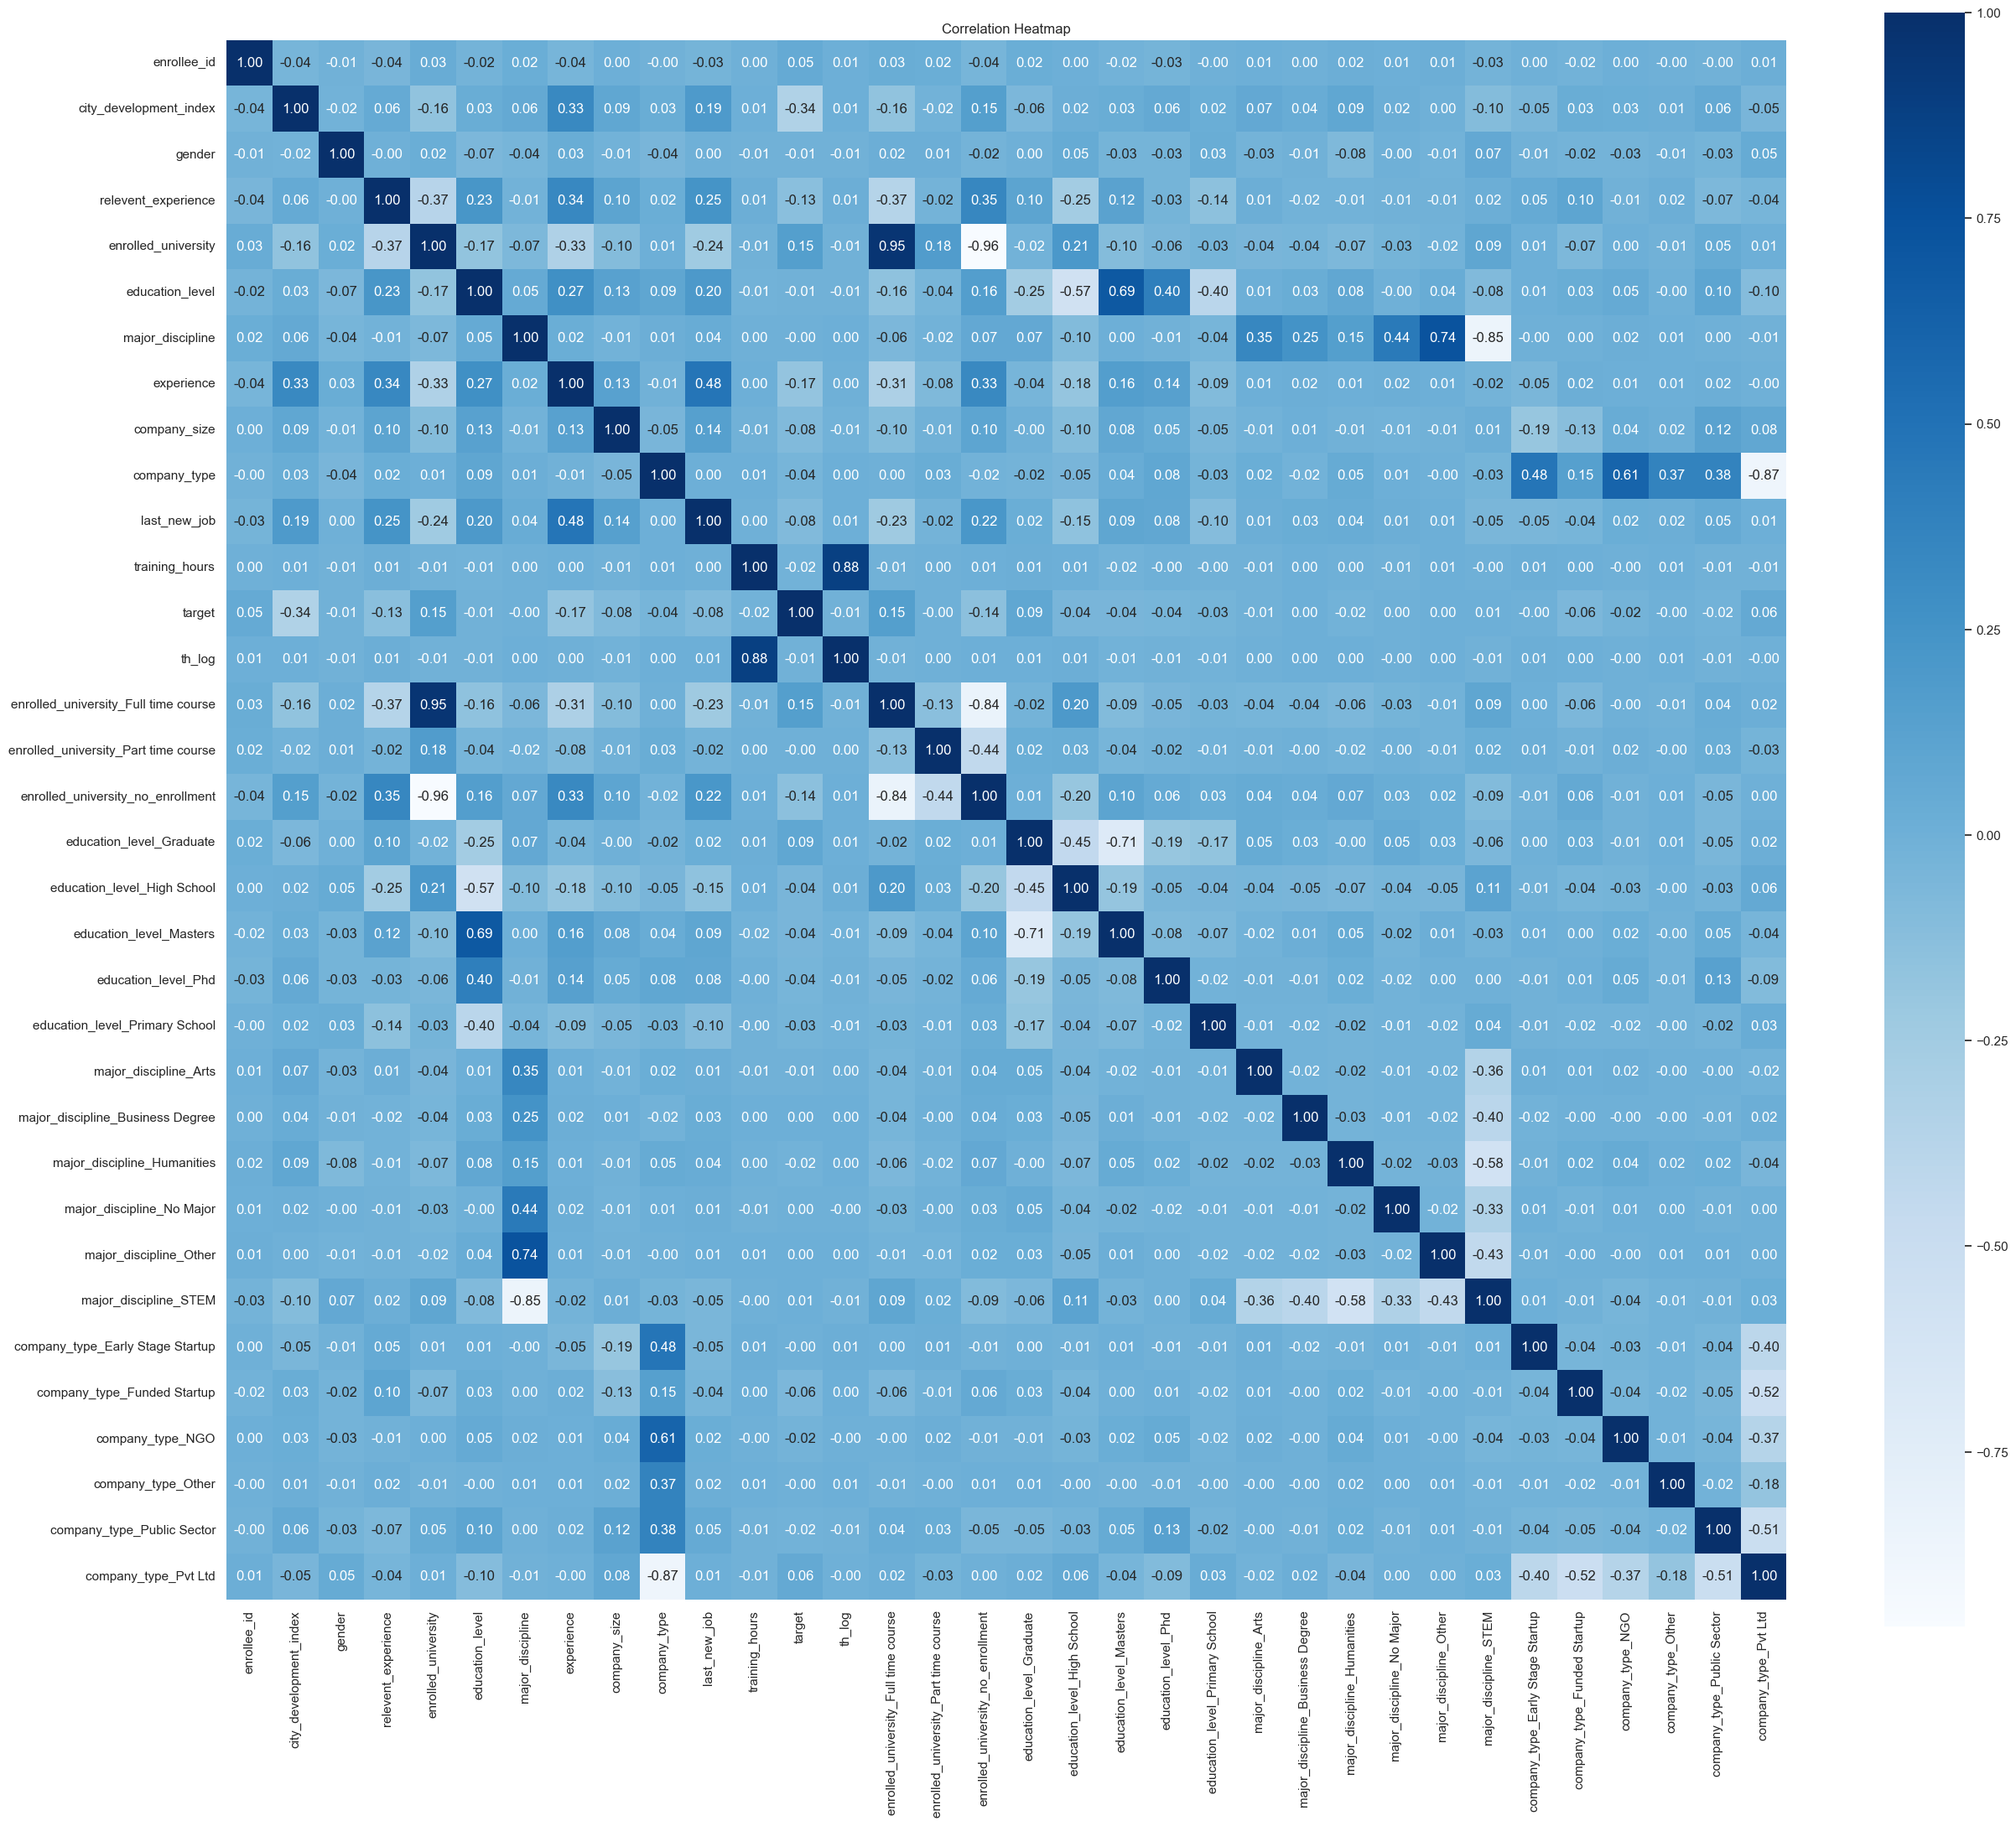

In [50]:

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

### Feature Extraction

In [51]:
def group_experience(experience):
    if experience <= 5:
        return 'Junior'
    elif experience <= 10:
        return 'Mid'
    else:
        return 'Senior'

df['group_experience'] = df['experience'].apply(group_experience)

In [52]:
def group_company_size(size):
    if size <= 3:
        return 'Small Company'
    elif size <= 6:
        return 'Medium Company'
    else:
        return 'Big Company'

In [53]:
df['group_company_size'] = df['company_size'].apply(group_company_size)

In [54]:
df.sample()

enrollee_id     city  city_development_index  gender  \
4610         6543  city_23                   0.899       1   

      relevent_experience  enrolled_university  education_level  \
4610                    1                    0                2   

      major_discipline  experience  company_size  ...  major_discipline_Other  \
4610                 4          21             5  ...                   False   

      major_discipline_STEM  company_type_Early Stage Startup  \
4610                  False                             False   

      company_type_Funded Startup  company_type_NGO  company_type_Other  \
4610                        False             False               False   

      company_type_Public Sector  company_type_Pvt Ltd  group_experience  \
4610                       False                  True            Senior   

      group_company_size  
4610      Medium Company  

[1 rows x 37 columns]

In [55]:
group_experience = {
    'Junior': 0,
    'Mid': 1,
    'Senior':2
}

df['group_experience'] = df['group_experience'].map(group_experience)

In [56]:
group_company = {
    'Small Company':0,
    'Medium Company':1,
    'Big Company':2
}

df['group_company_size'] = df['group_company_size'].map(group_company)

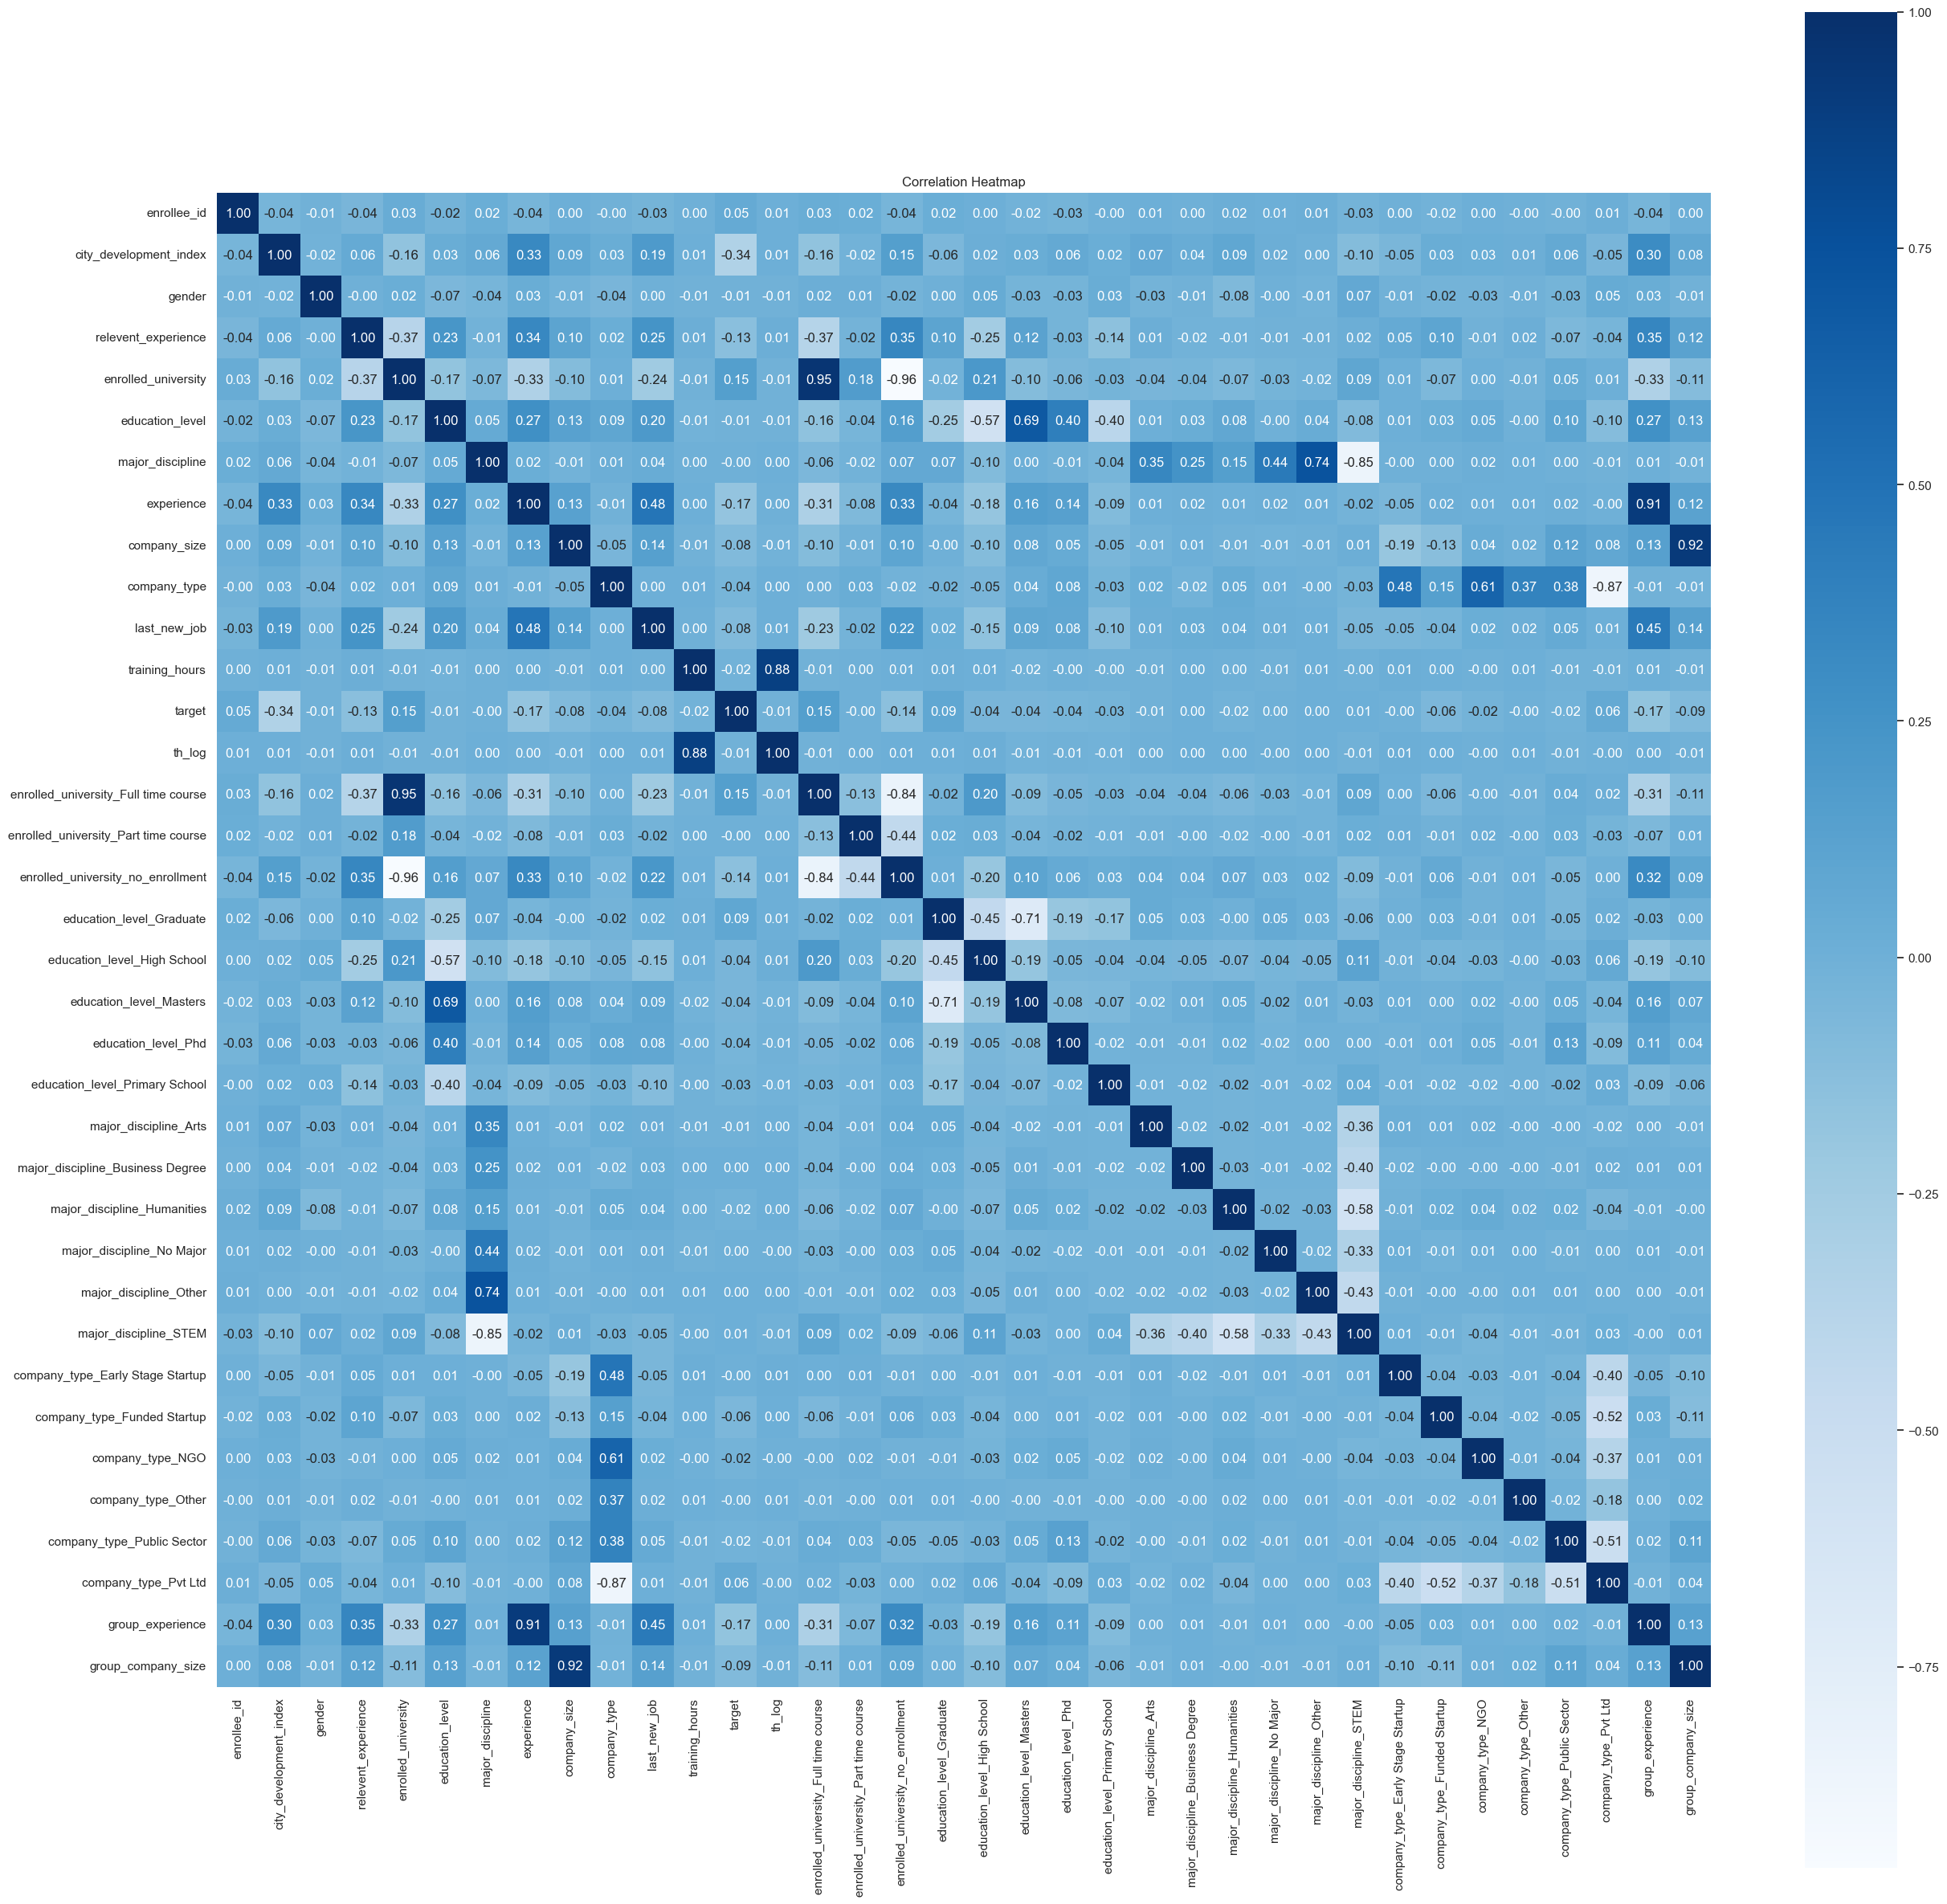

In [57]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

In [103]:
filtered_df = df.iloc[:, 1:14]
filtered_df

city  city_development_index  gender  relevent_experience  \
0      city_103                   0.920       1                    1   
1       city_40                   0.776       1                    0   
2       city_21                   0.624       1                    0   
3      city_115                   0.789       1                    0   
4      city_162                   0.767       1                    1   
...         ...                     ...     ...                  ...   
19153  city_173                   0.878       1                    0   
19154  city_103                   0.920       1                    1   
19155  city_103                   0.920       1                    1   
19156   city_65                   0.802       1                    1   
19157   city_67                   0.855       1                    0   

       enrolled_university  education_level  major_discipline  experience  \
0                        0                2                 0          21   
1                        0                2                 0          15   
2                        2                2                 0           5   
3                        0                2                 2           0   
4                        0                3                 0          21   
...                    ...              ...               ...         ...   
19153                    0                2                 1          14   
19154                    0                2                 0          14   
19155                    0                2                 0          21   
19156                    0                1                 0           0   
19157                    0                0                 0           2   

       company_size  company_type  last_new_job  training_hours  target  
0                 2             0             1              36     1.0  
1                 2             0             5              47     0.0  
2                 2             0             0              83     0.0  
3                 2             0             0              52     1.0  
4                 2             1             4               8     0.0  
...             ...           ...           ...             ...     ...  
19153             2             0             1              42     1.0  
19154             2             0             4              52     1.0  
19155             2             0             4              44     0.0  
19156             4             0             2              97     0.0  
19157             2             0             1             127     0.0  

[18691 rows x 13 columns]

In [139]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18691 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18691 non-null  int32  
 1   city_development_index  18691 non-null  float64
 2   gender                  18691 non-null  int64  
 3   relevent_experience     18691 non-null  int64  
 4   enrolled_university     18691 non-null  int64  
 5   education_level         18691 non-null  int64  
 6   major_discipline        18691 non-null  int64  
 7   experience              18691 non-null  int64  
 8   company_size            18691 non-null  int64  
 9   company_type            18691 non-null  int64  
 10  last_new_job            18691 non-null  int64  
 11  training_hours          18691 non-null  int64  
 12  target                  18691 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 2.4 MB


In [112]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada data kategori
filtered_df['city'] = label_encoder.fit_transform(filtered_df['city'])


# Dapatkan nilai unik dari hasil label encoding
nilai_unik = np.unique(filtered_df['city'])

print("Hasil label encoding:", nilai_unik)
print("Kategori unik:", label_encoder.classes_)

Hasil label encoding: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]
Kategori unik: ['city_1' 'city_10' 'city_100' 'city_101' 'city_102' 'city_103' 'city_104'
 'city_105' 'city_106' 'city_107' 'city_109' 'city_11' 'city_111'
 'city_114' 'city_115' 'city_116' 'city_117' 'city_118' 'city_12'
 'city_120' 'city_121' 'city_123' 'city_126' 'city_127' 'city_128'
 'city_129' 'city_13' 'city_131' 'city_133' 'city_134' 'city_136'
 'city_138' 'city_139' 'city_14' 'city_140' 'city_141' 'city_142'
 'city_143' 'city_144' 'city_145' 'city_146' 'city_149' 'city

In [114]:
X = filtered_df.drop('target', axis=1)
y = df['target']

In [122]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X[[n]])
  X[n] = scaler.transform(X[[n]])

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12345)

### Handle class imbalance

In [124]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [125]:
y_train.value_counts()

target
0.0    11213
1.0    11213
Name: count, dtype: int64

In [126]:
print(f'Jumlah Data Train = {X_train.shape, y_train.shape}')

Jumlah Data Train = ((22426, 12), (22426,))


In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Inisialisasi model Gaussian Naive Bayes
gnb = GaussianNB()

# Tentukan kumpulan nilai var_smoothing yang akan diuji
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5)

# Lakukan pelatihan pada data latih
grid_search.fit(X_train, y_train)

# Melihat parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Evaluasi model pada data uji
accuracy = grid_search.score(X_test, y_test)
print(f"Akurasi model terbaik: {accuracy:.2f}")

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score model terbaik: {f1:.2f}")

Parameter terbaik: {'var_smoothing': 1e-09}
Akurasi model terbaik: 0.70
F1-score model terbaik: 0.71


In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Definisikan model KNN
knn = KNeighborsClassifier()

# Tentukan rentang parameter untuk dioptimalkan
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=7, scoring=make_scorer(f1_score, average='weighted'))

# Melakukan optimasi
grid_search.fit(X_train, y_train)

# Melihat parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Evaluasi model pada data uji
accuracy = grid_search.score(X_test, y_test)
print(f"Akurasi model terbaik: {accuracy:.2f}")

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score model terbaik: {f1:.2f}")

Parameter terbaik: {'n_neighbors': 3, 'p': 1}
Akurasi model terbaik: 0.69
F1-score model terbaik: 0.69


In [90]:
%pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.2/99.7 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.3/99.7 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.3/99.7 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.4/99.7 MB 1.9 MB/s eta 0:00:54
   ---------------------------------------- 0.4/99.7 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 0.5/99.7 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.6/99.7 MB 1.6 MB/s eta 0:01:01
   ---------------------------------------- 0.6/99.7 MB 1.5 MB/s eta 0:01:07
   -----------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier()

# Tentukan kumpulan hyperparameter yang akan diuji
param_grid = {
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(50, 300, 50)),
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}

# Inisialisasi GridSearchCV dengan skor F1-score
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))

# Lakukan pelatihan pada data latih
grid_search.fit(X_train, y_train)

# Hasil hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

# Evaluasi model pada data uji
accuracy = grid_search.score(X_test, y_test)
print(f"Akurasi model terbaik: {accuracy:.2f}")

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score model terbaik: {f1:.2f}")

Hyperparameter terbaik: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Akurasi model terbaik: 0.76
F1-score model terbaik: 0.76


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Tentukan kumpulan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': list(range(50, 200, 50)),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))

# Lakukan pelatihan pada data latih
grid_search.fit(X_train, y_train)

# Hasil hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

# Evaluasi model pada data uji
accuracy = grid_search.score(X_test, y_test)
print(f"Akurasi model terbaik: {accuracy:.2f}")

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score model terbaik: {f1:.2f}")

Hyperparameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Akurasi model terbaik: 0.75
F1-score model terbaik: 0.75


In [132]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=200)

xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

# confussion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      2806
         1.0       0.52      0.51      0.52       933

    accuracy                           0.76      3739
   macro avg       0.68      0.68      0.68      3739
weighted avg       0.76      0.76      0.76      3739

[[2367  439]
 [ 453  480]]


In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Definisikan model Decision Tree
dt = DecisionTreeClassifier()

# Tentukan rentang parameter untuk dioptimalkan
param_grid = {'max_depth': list(range(3, 10)), 'min_samples_split': list(range(2, 5)), 'ccp_alpha': [0.0001, 0.001, 0.01, 0.1]}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))

# Lakukan pelatihan pada data latih
grid_search.fit(X_train, y_train)

# Hasil hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

# Evaluasi model pada data uji
accuracy = grid_search.score(X_test, y_test)
print(f"Akurasi model terbaik: {accuracy:.2f}")

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score model terbaik: {f1:.2f}")

Hyperparameter terbaik: {'ccp_alpha': 0.0001, 'max_depth': 9, 'min_samples_split': 4}
Akurasi model terbaik: 0.73
F1-score model terbaik: 0.73


In [152]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier()

# Tentukan kumpulan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))

# Lakukan pelatihan pada data latih
grid_search.fit(X_train, y_train)

# Hasil hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

# Evaluasi model pada data uji
accuracy = grid_search.score(X_test, y_test)
print(f"Akurasi model terbaik: {accuracy:.2f}")

# Evaluasi model pada data uji
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score model terbaik: {f1:.2f}")

Hyperparameter terbaik: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Akurasi model terbaik: 0.78
F1-score model terbaik: 0.78


In [143]:
%pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.2


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ------------------ ------------------- 141.3/284.2 MB 760.4 kB/s eta 0:03:08
   ------------------ ------------------- 141.3/284.2 MB 757.8 kB/s eta 0:03:09
   ------------------ ------------------- 141.4/284.2 MB 756.9 kB/s eta 0:03:09
   ------------------ ------------------- 141.4/284.2 MB 756.0 kB/s eta 0:03:09
   ------------------ ------------------- 141.4/284.2 MB 754.2 kB/s eta 0:03:10
   ------------------ ------------------- 141.5/284.2 MB 752.6 kB/s eta 0:03:10
   ------------------ ------------------- 141.5/284.2 MB 752.5 kB/s eta 0:03:10
   ------------------ ------------------- 141.5/284.2 MB 750.0 kB/s eta 0:03:11
   ------------------ ------------------- 141.6/284.2 MB 750.0 kB/s eta 0:03:11
   ------------------ ------------------- 141.6/284.2 MB 747.4 kB/s eta 0:03:11
   ------------------ ------------------- 141.6/284.2 MB 745.7 kB/s eta 0:03:12
   ------------------ ------------------- 141.6/284.2 MB 744.8 kB/s eta 0:03:12
   ------------------ -----------------

In [144]:
import tensorflow as tf

# print version
print(tf.__version__)

2.14.0


In [151]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Inisialisasi model Sequential
model = Sequential()

# Tambahkan lapisan input
model.add(Dense(64, activation='relu', input_shape=(12,)))

# Tambahkan lapisan tersembunyi
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Menggunakan dropout untuk menghindari overfitting

# Tambahkan lapisan output untuk binary classification
model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' untuk binary classification

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Prediksi menggunakan model
predictions = model.predict(X_test)

Epoch 1/20
701/701 [==============================] - 3s 3ms/step - loss: 0.5962 - accuracy: 0.6941 - val_loss: 0.5851 - val_accuracy: 0.7117
Epoch 2/20
701/701 [==============================] - 2s 3ms/step - loss: 0.5747 - accuracy: 0.7137 - val_loss: 0.5657 - val_accuracy: 0.7328
Epoch 3/20
701/701 [==============================] - 3s 4ms/step - loss: 0.5640 - accuracy: 0.7226 - val_loss: 0.5655 - val_accuracy: 0.7320
Epoch 4/20
701/701 [==============================] - 3s 4ms/step - loss: 0.5548 - accuracy: 0.7287 - val_loss: 0.5754 - val_accuracy: 0.7154
Epoch 5/20
701/701 [==============================] - 3s 4ms/step - loss: 0.5471 - accuracy: 0.7366 - val_loss: 0.5571 - val_accuracy: 0.7264
Epoch 6/20
701/701 [==============================] - 2s 4ms/step - loss: 0.5426 - accuracy: 0.7387 - val_loss: 0.5574 - val_accuracy: 0.7317
Epoch 7/20
701/701 [==============================] - 2s 3ms/step - loss: 0.5364 - accuracy: 0.7397 - val_loss: 0.5584 - val_accuracy: 0.7253
Epoch 

In [149]:
print(f"Test loss: {test_loss:.2f}")

Test loss: 0.57
